# This is the first part of the Covid-19 project.

### This notebook includes all the data loading, pre-processing and exploration. In addition, it includes visualization schemas with normal graphs, pie charts, heatmaps and others. Lastly, here we also deploy some prediction techniques (not using neural networks) like ARIMA, SVMs etc.

### A.1: Load the necessary libraries






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import folium
import io
from operator import itemgetter, attrgetter
import os
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from google.colab import drive ,files
import sys
from difflib import SequenceMatcher
from prophet import Prophet
import time, math
from random import randint
from pandas import read_csv
import datetime
from matplotlib import pyplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [2]:
drive.mount('/content/gdrive', force_remount=True)
sys.path.append('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [51]:
import submain as sub
import visualize as vis
import curvefiting as crv
import metrics as mtr

### A.2: Load the necessary data

In [4]:
os.chdir("/content/gdrive/My Drive")
data = pd.read_csv('WHO-COVID-19-global-data.csv')
data = pd.DataFrame(data)
population =  pd.read_excel('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx', index_col=None, header=None)
population = pd.DataFrame(population)
population = np.array(population)
more_data = pd.read_csv('owid-covid-data-old.csv')
more_data = pd.DataFrame(more_data)
sys.path.append('/content/gdrive/My Drive')

In [5]:
more_data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

## A.3: Data Pre-processing and Exploration

In [6]:
Dates_reported,countries,New_cases,New_deaths,Cumulative_cases,Cumulative_deaths = sub.WHO_data(data)
Dates,all_countries,icu_patients,hosp_patients,cumulative_tests,new_tests,life_exp,cum_vaccinations,vaccinated,new_vaccines,fully_vaccine = sub.Other_data(more_data)
Population = sub.World_Population(population,countries)
print(Population)

[['Burundi', 11890781.0], ['Comoros', 869595.0], ['Djibouti', 988002.0], ['Eritrea', 3546427.0], ['Ethiopia', 114963583.0], ['Kenya', 53771300.0], ['Madagascar', 27691019.0], ['Malawi', 19129955.0], ['Mauritius', 1271767.0], ['Mayotte', 272813.0], ['Mozambique', 31255435.0], ['Réunion', 895308.0], ['Rwanda', 12952209.0], ['Seychelles', 98340.0], ['Somalia', 15893219.0], ['South Sudan', 11193729.0], ['Uganda', 45741000], ['United Republic of Tanzania', 59734213.0], ['Zambia', 18383956.0], ['Zimbabwe', 14862927.0], ['Angola', 32866267.999999996], ['Cameroon', 26545864.0], ['Central African Republic', 4829764.0], ['Chad', 16425859.0], ['Congo', 5518092.0], ['Democratic Republic of the Congo', 89561404.0], ['Equatorial Guinea', 1402985.0], ['Gabon', 2225728.0], ['Sao Tome and Principe', 219161.0], ['Botswana', 2351625.0], ['Eswatini', 1160164.0], ['Lesotho', 2142252.0], ['Namibia', 2540916.0], ['South Africa', 59308690.0], ['Benin', 12123198.0], ['Burkina Faso', 20903278.0], ['Cabo Verde',

In [7]:
Overall_per_country = []
Overll_per_country = sub.Make_Overall(Overall_per_country,countries,all_countries,Cumulative_cases,Cumulative_deaths,cumulative_tests,New_cases,New_deaths,new_tests,hosp_patients,icu_patients,life_exp,Population)
for i in range(len(Overall_per_country[0])):
  print((Overall_per_country[103][i]))

Italy
10925485.0
146149.0
224876148.0
1.337688898936752
180700.54051293322
2417.2110707602155
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5316455696202533, 2.272727272727273, 3.056768558951965, 3.1055900621118013, 3.0, 2.6153846153846154, 2.364864864864865, 2.5709219858156027, 2.0070838252656436, 2.5540275049115913, 3.1574740207833734, 3.463904176108773, 3.83618455158113, 4.249352890422778, 3.9605643379228286, 4.96271186440678, 5.04797208896642, 6.217361316385851, 6.636173968865351, 6.722689075630252, 7.168742921857304, 6.810984544122513, 7.309976966905079, 7.7126518942101505, 7.9445185044118585, 8.338700193206956, 8.29779456561472, 8.574892069500862, 9.00556198439658, 9.259697656329264, 9.506155458569932, 9.858910604834046, 10.086575430860647, 10.137945591576752, 10.559781729057319, 10.838956657150273, 11.03399563922243, 11.3

In [8]:
china = Overall_per_country[81]
china[12],china[13],china[14],china[15] = np.array(china[12]),np.array(china[13]),np.array(china[14]),np.array(china[15])
china[12].shape,china[13].shape,china[14].shape,china[15].shape = (len(china[12]),1),(len(china[12]),1),(len(china[12]),1),(len(china[12]),1)
fuck = np.array(Dates_reported)
fuck.shape = (len(fuck),1)
CHINA = np.concatenate((fuck,china[12]), axis=1)
subscript = np.zeros(len(CHINA))
for i in range(len(CHINA)-1):
  if (i==0):
    continue
  else:
    if (abs(float(CHINA[i][1])-float(CHINA[i-1][1]))>=500):
      subscript[i] = 1
subscript.shape = (len(subscript),1)
CHINA2 =  np.concatenate((CHINA,subscript), axis=1)
df = pd.DataFrame(CHINA2, columns = ['Date','New Cases','Signalization Pointer'])
print(df)

           Date New Cases Signalization Pointer
0    2020-01-03       0.0                   0.0
1    2020-01-04       0.0                   0.0
2    2020-01-05       0.0                   0.0
3    2020-01-06       0.0                   0.0
4    2020-01-07       0.0                   0.0
..          ...       ...                   ...
755  2022-01-27   17960.0                   0.0
756  2022-01-28   19712.0                   1.0
757  2022-01-29   22361.0                   1.0
758  2022-01-30   19584.0                   1.0
759  2022-01-31   11112.0                   0.0

[760 rows x 3 columns]


In [9]:
for i in Overall_per_country:
  cases_million = []
  deaths_million = []
  for j in Population:
    if (i[0]==j[0]):
      for k in range(len(i[13])):
        jj = 10**6*(i[13][k]/j[1])
        kk = 10**6*(i[15][k]/j[1])
        cases_million.append(jj)
        deaths_million.append(kk)
  i.append(cases_million)
  i.append(deaths_million)

"""Test the content"""
# for i in range(len(Overall_per_country[0])):
#   print((Overall_per_country[81][i]))

'Test the content'

In [10]:
"""Test the content"""
# for i in range(len(countries)):
#   templist=[]
#   for j in range(len(all_countries)):
#     x = similar(all_countries[j],countries[i])
#     templist.append(x)
#   j = templist.index(max(templist))
#   print(countries[i], "is similar to", all_countries[j])

'Test the content'

In [11]:
"""Test the content"""
# for i in range(len(all_countries)):
#   print(all_countries[i],i)
#   if (cumulative_tests[i]!=[]):
#     print(new_tests[i])
#     print(cumulative_tests[i])
#     print((hosp_patients[i]))
#     print((icu_patients[i]))
#     print(life_exp[i])
#     print("")

'Test the content'

In [12]:
L=len(Dates_reported)
New_cases,New_deaths,Cumulative_cases,Cumulative_deaths,new_tests,cumulative_tests,hosp_patients,icu_patients,cum_vaccinations,vaccinated,new_vaccines,fully_vaccine = sub.padding_function(countries,all_countries,New_cases,New_deaths,Cumulative_cases,Cumulative_deaths,new_tests,cumulative_tests,hosp_patients,icu_patients,cum_vaccinations,vaccinated,new_vaccines,fully_vaccine,L)

In [13]:
for i in range(len(countries)):
  My_array = [[],[],[],[]]
  templist = []
  for j in range(len(all_countries)):
    x = similar(all_countries[j],countries[i])
    templist.append(x)
    if (countries[i]=="Czechia"):
      j=49
    elif (countries[i]=="Russian Federation"):
      j=163
    else:
      j = templist.index(max(templist))
    My_array[0] = cum_vaccinations[j]
    My_array[1] = vaccinated[j]
    My_array[2] = new_vaccines[j]
    My_array[3] = fully_vaccine[j]
  Overall_per_country[i].append(My_array)


In [14]:
"""Test the content"""
# print(len(cum_vaccinations[97]))
# for i in range(len(all_countries)):
#   print(all_countries[i],i)
#   if (cumulative_tests[i]!=[]):
#     print((hosp_patients[i]))
#     print((icu_patients[i]))
#     print(life_exp[i])
#     print(cum_vaccinations[i])
#     print(vaccinated[i])
#     print(new_vaccines[i])
#     print(fully_vaccine[i])
#     print("")

'Test the content'

In [15]:
"""Test the content"""
# for j,i in enumerate(icu_patients):
#   if (sum(i)!=0):
#     print(i)
#     print(j,all_countries[j])
#     print("")

'Test the content'

In [16]:
World_cases ,World_deaths, World_tests,Daily_World_cases, Daily_World_deaths, Daily_World_tests, M_R_global_per_day, M_R_global_over_time,Total_cases,Total_deaths,Wcases_per_million,Wdeaths_per_million,Total_tests,Global_life_Exp,Daily_World_Positve_Rate,World_vaccines,Daily_World_vaccines = sub.World_data(Population,Overall_per_country,Cumulative_cases,Cumulative_deaths,cumulative_tests,New_cases,New_deaths,new_tests,life_exp,cum_vaccinations,new_vaccines)
World_cases = [round(x) for x in World_cases]
World_deaths = [round(x) for x in World_deaths]
World_tests = [round(x) for x in World_tests]
World_vaccines = [round(x) for x in World_vaccines]
print(Daily_World_Positve_Rate)
print(Daily_World_cases)
print(len(Daily_World_Positve_Rate))
print(Global_life_Exp)
daily_world_cases = np.copy(Daily_World_cases)
daily_world_cases = list (daily_world_cases)
print(np.sum(Daily_World_cases))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 41.0, 0, 0, 0, 0, 1.0, 0, 81.0, 79.0, 46.5, 13.091, 130.0, 35.0, 29.312, 49.571, 30.615, 36.163, 745.5, 46.132, 47.976, 45.87, 25.32, 44.328, 49.258, 54.514, 53.2, 37.682, 39.149, 26.68, 28.57, 24.87, 414.4, 59.839, 26.809, 19.056, 20.24, 22.02, 14.36, 16.664, 3.346, 0, 5.081, 206.2, 3.352, 10.425, 14.0, 25.452, 21.672, 26.091, 38.894, 26.123, 28.662, 31.89, 28.494, 34.615, 34.664, 28.015, 17.27, 24.366, 17.878, 21.801, 26.022, 23.179, 27.1, 18.03, 21.156, 20.869, 21.073, 25.287, 22.908, 18.968, 19.438, 21.735, 18.084, 19.258, 19.695, 19.172, 17.798, 17.161, 16.203, 15.02, 14.483, 14.617, 11.527, 12.783, 14.199, 11.374, 9.819, 11.938, 11.054, 12.307, 12.025, 12.164, 11.279, 10.587, 9.11, 10.113, 9.746, 11.725, 13.515, 12.517, 10.691, 10.596, 12.793, 14.841, 13.266, 15.916, 13.976, 11.694, 11.752, 12.906, 14.651, 14.221, 16.722, 17.118, 14.648, 12.726, 14.717, 15.52, 17.613, 17.376, 17.135, 15.768, 15.755, 16.01, 17.882, 18.322, 21.67, 19.852, 19.597, 18.918,

## A.4: Data Visualization

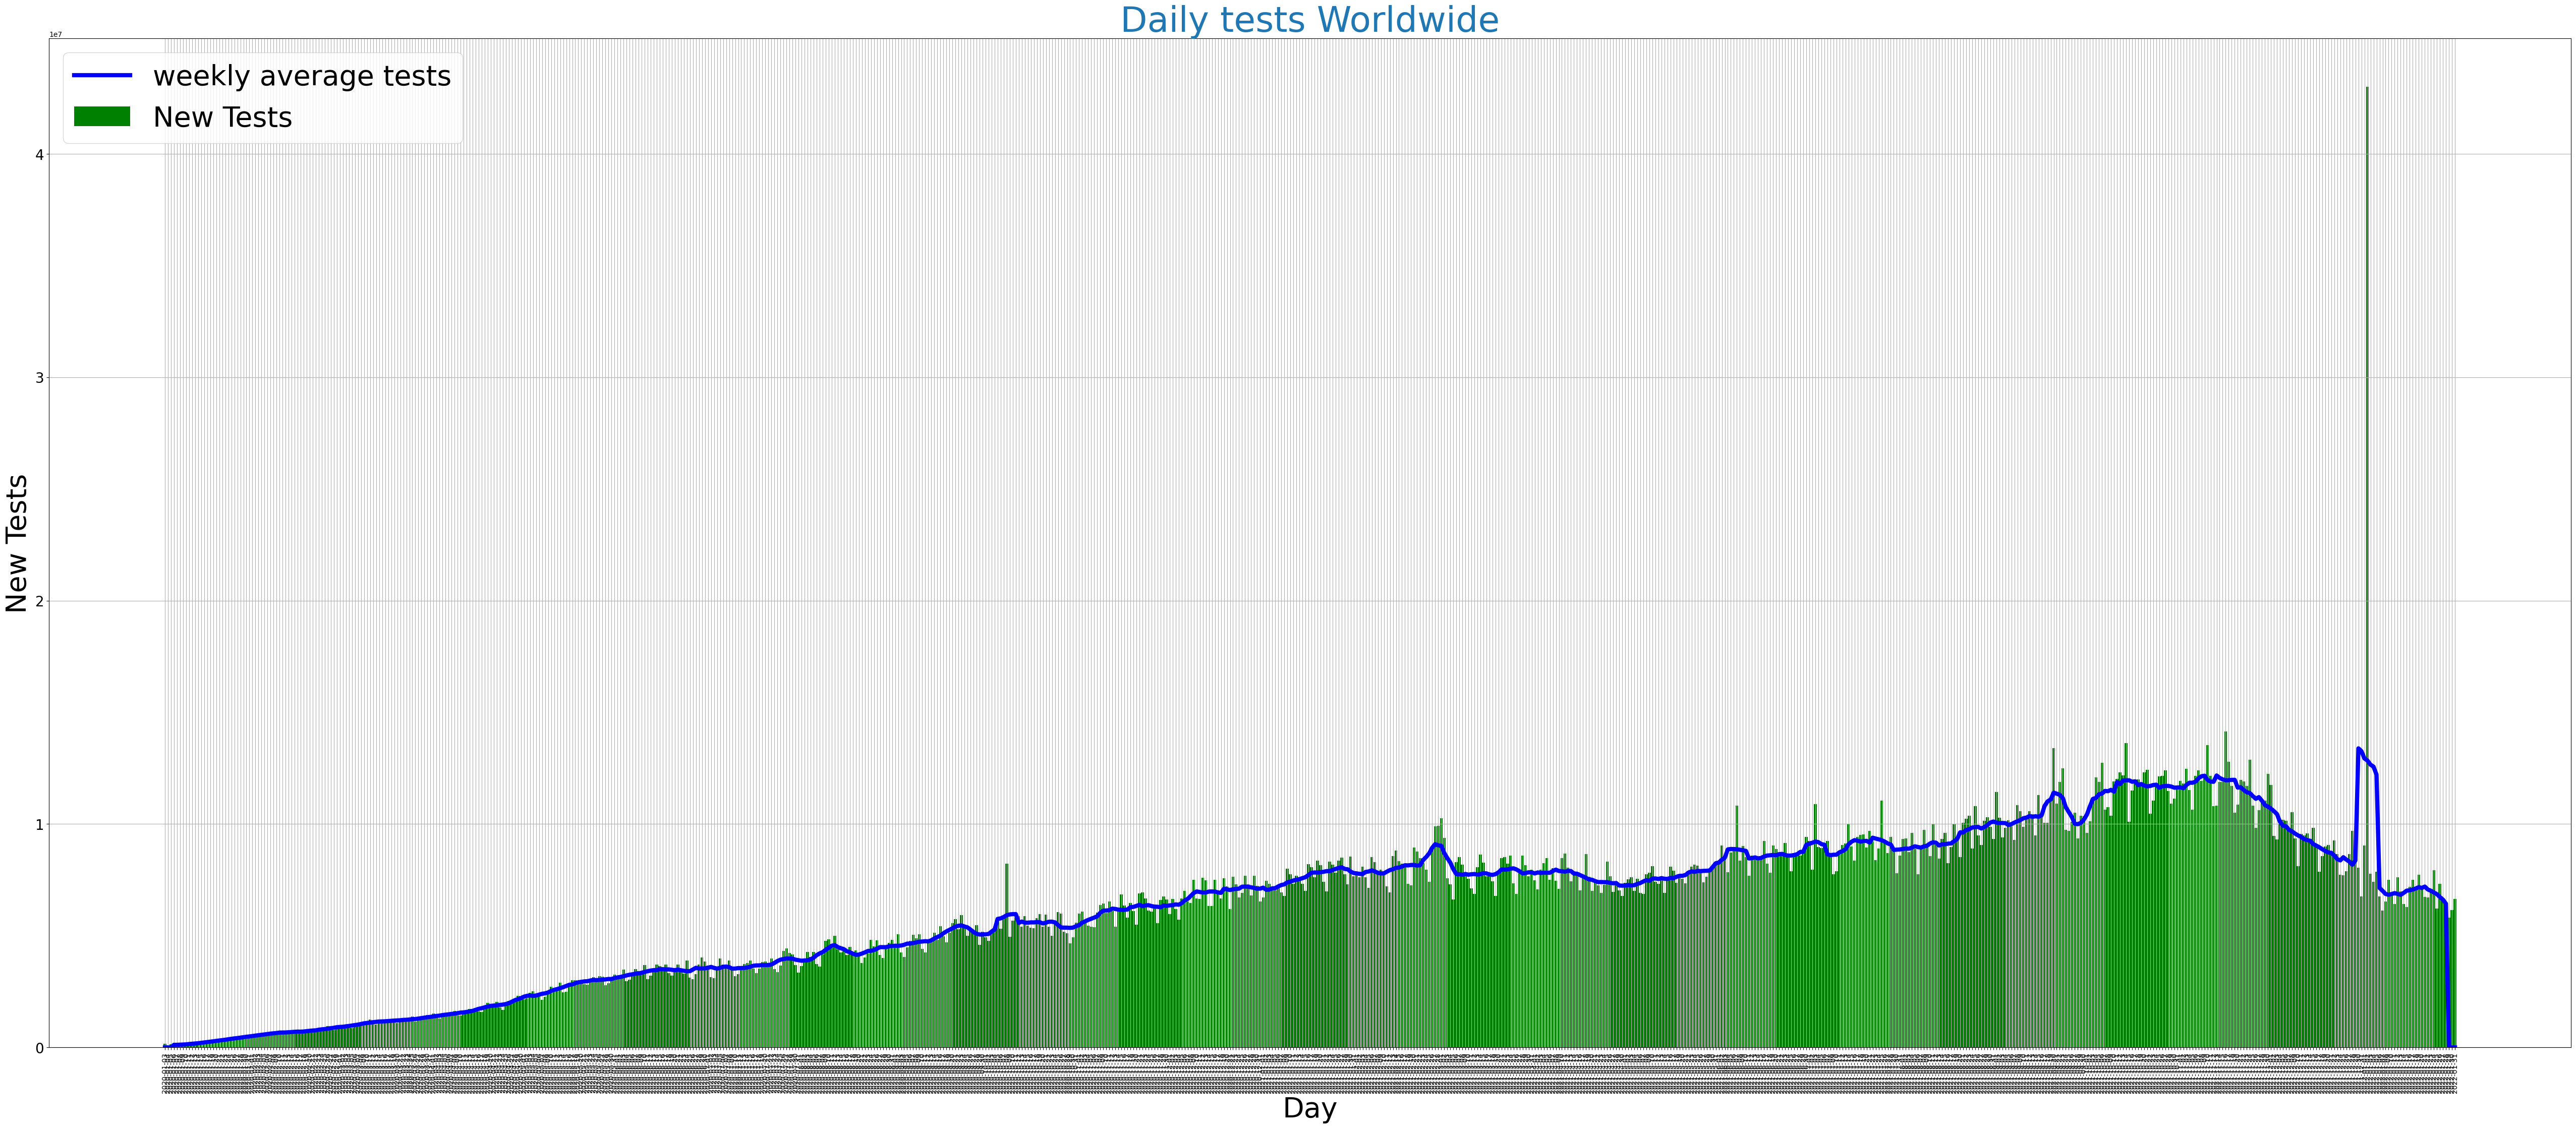

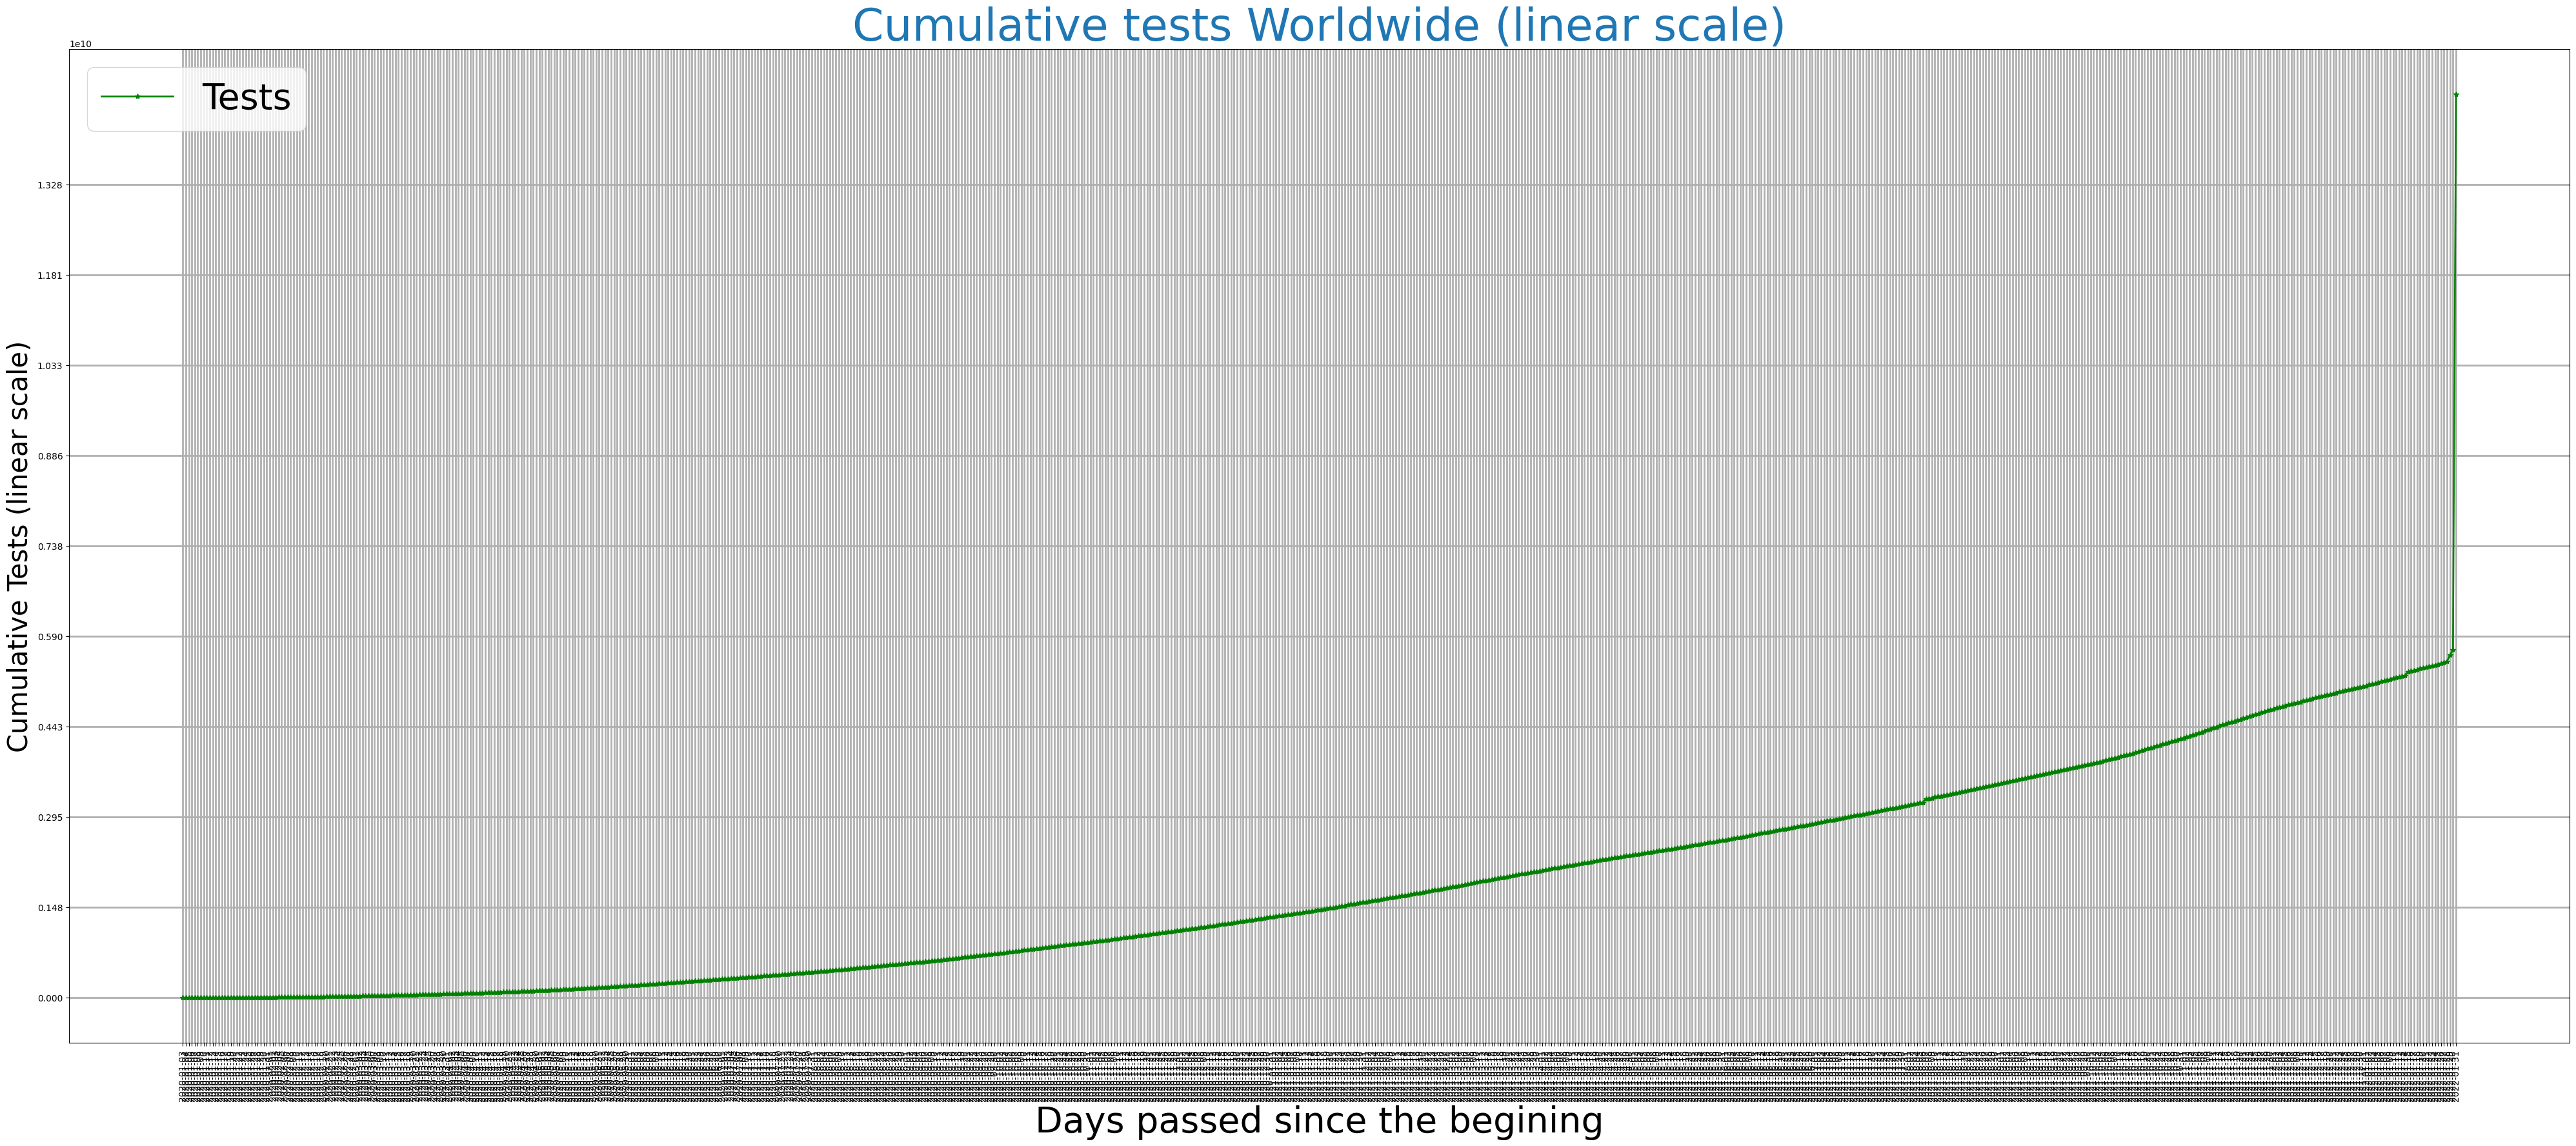

In [25]:
daily_tests = sub.moving_av(Daily_World_tests,7)
#Dates_reported.shape = (len(Dates_reported),)
vis.plot_daily_tests(Dates_reported,Daily_World_tests, daily_tests,"Worldwide")
vis.plot_cum_tests(Dates_reported,World_tests,"Worldwide","linear",1)

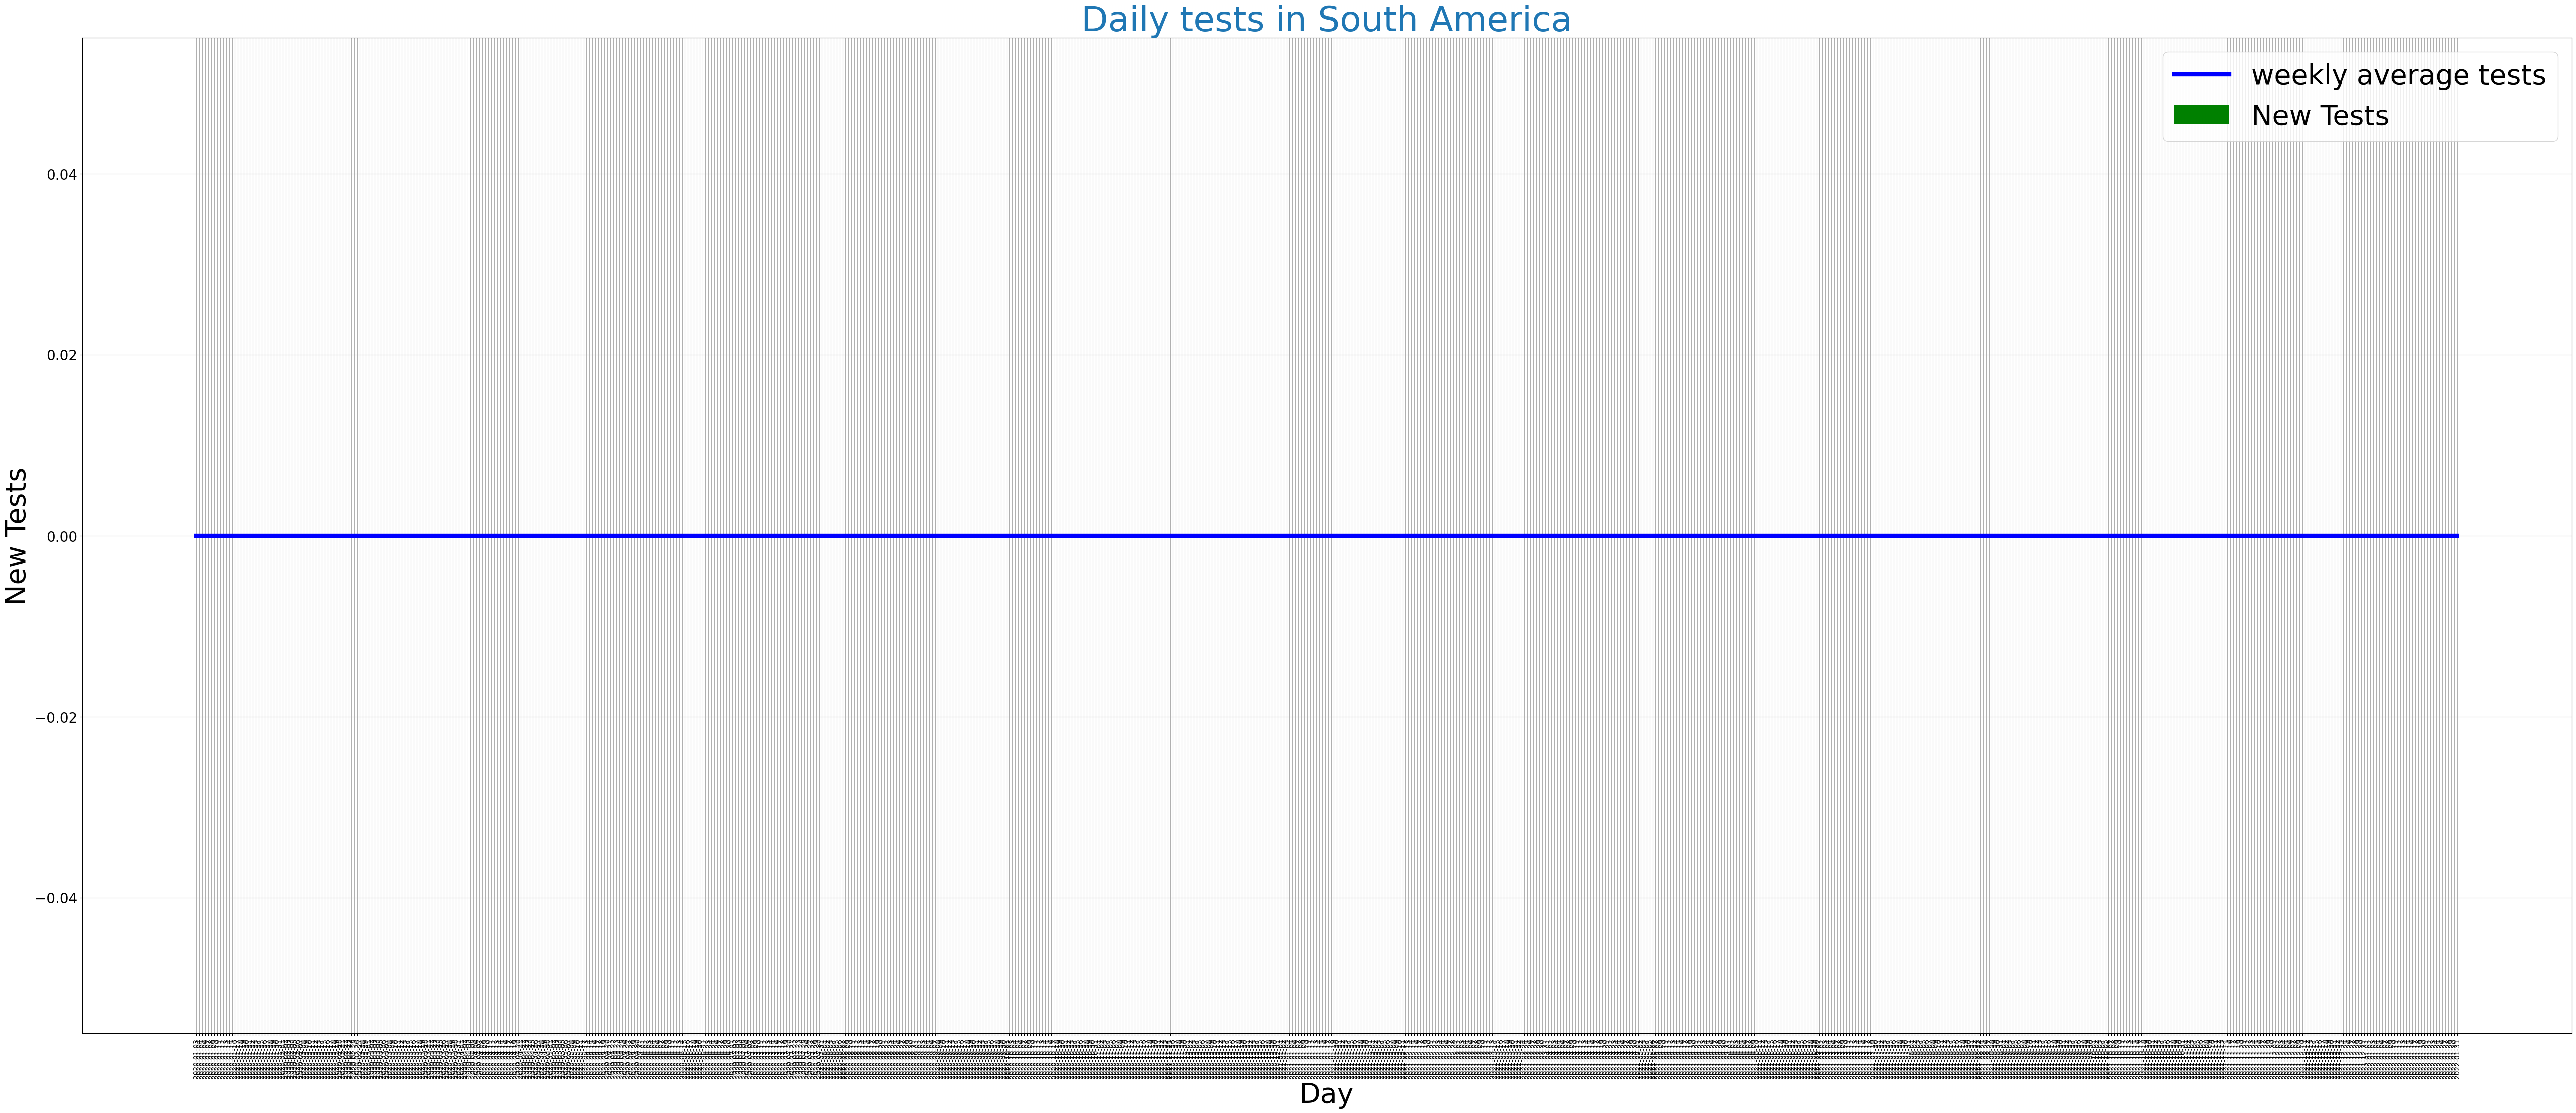

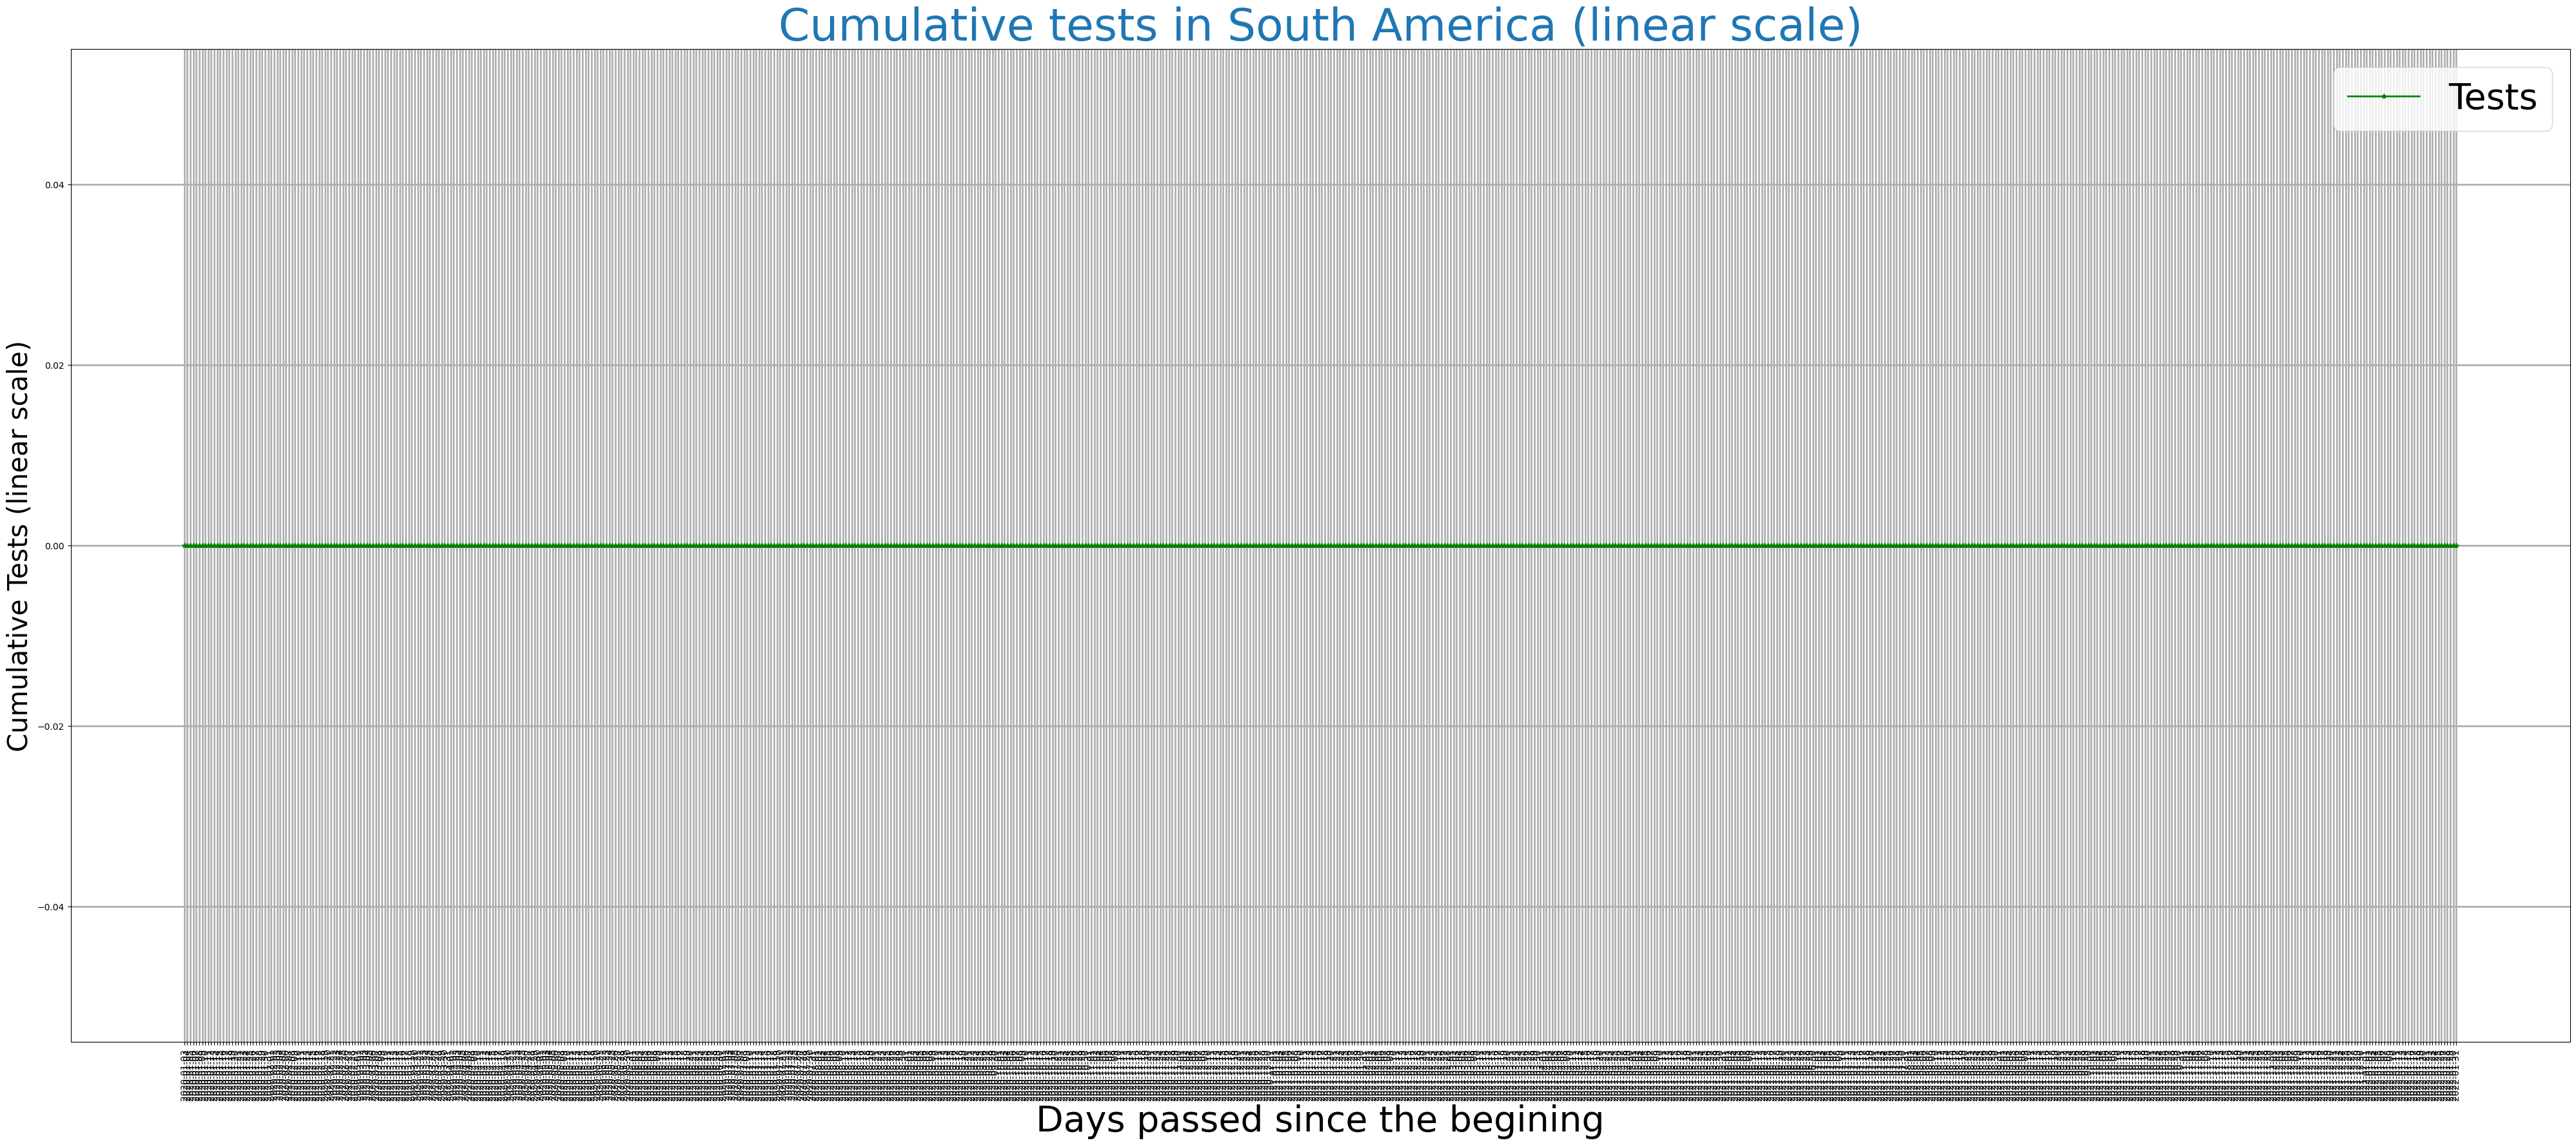

In [26]:
weekly_tests = sub.moving_av(new_tests[204],7)
#Dates_reported.shape = (len(Dates_reported),)
vis.plot_daily_tests(Dates_reported,new_tests[204], weekly_tests,"in "+all_countries[204])
vis.plot_cum_tests(Dates_reported,cumulative_tests[204],"in "+all_countries[204],"linear",cumulative_tests[204][-1])

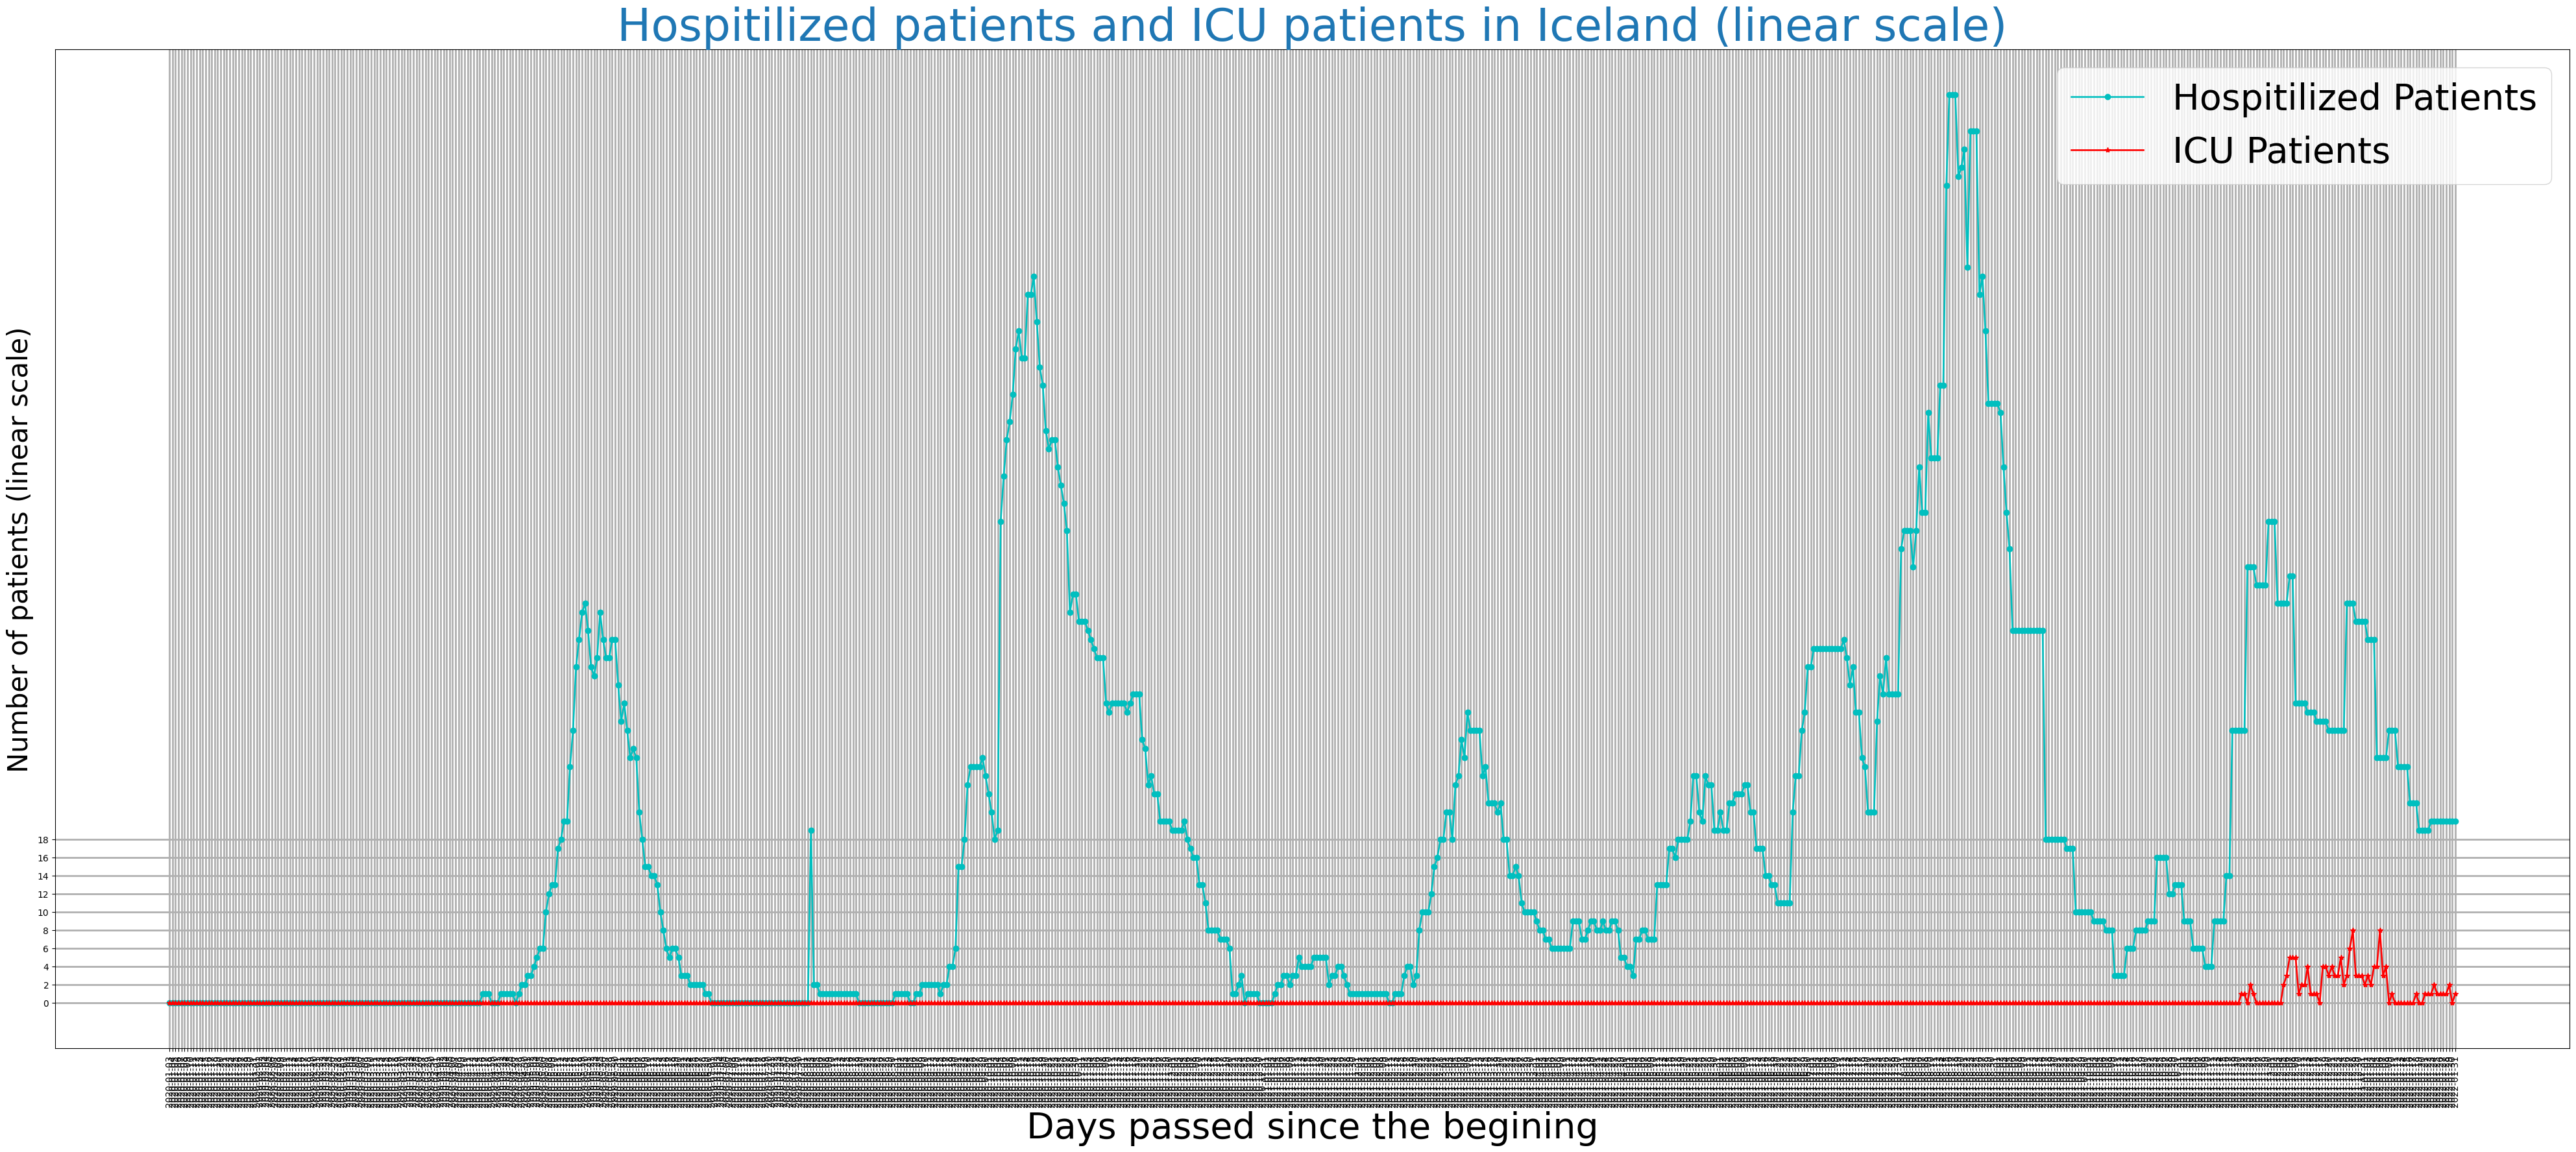

In [27]:
vis.plot_patients(Dates_reported,hosp_patients[97],icu_patients[97],"in "+all_countries[97],"linear",hosp_patients[97][-1])

In [28]:
vis.World_Statistics(Total_cases,Total_deaths,Wcases_per_million,Wdeaths_per_million)

The total cases of COVID-19 are: 373229380.0
The total deaths of COVID-19 are: 5658702.0
The World's Mortality Rate for COVID-19 is: 1.5161459154153405%
There are 48873 cases per 1 million and 740 deaths per 1 million people all around the world


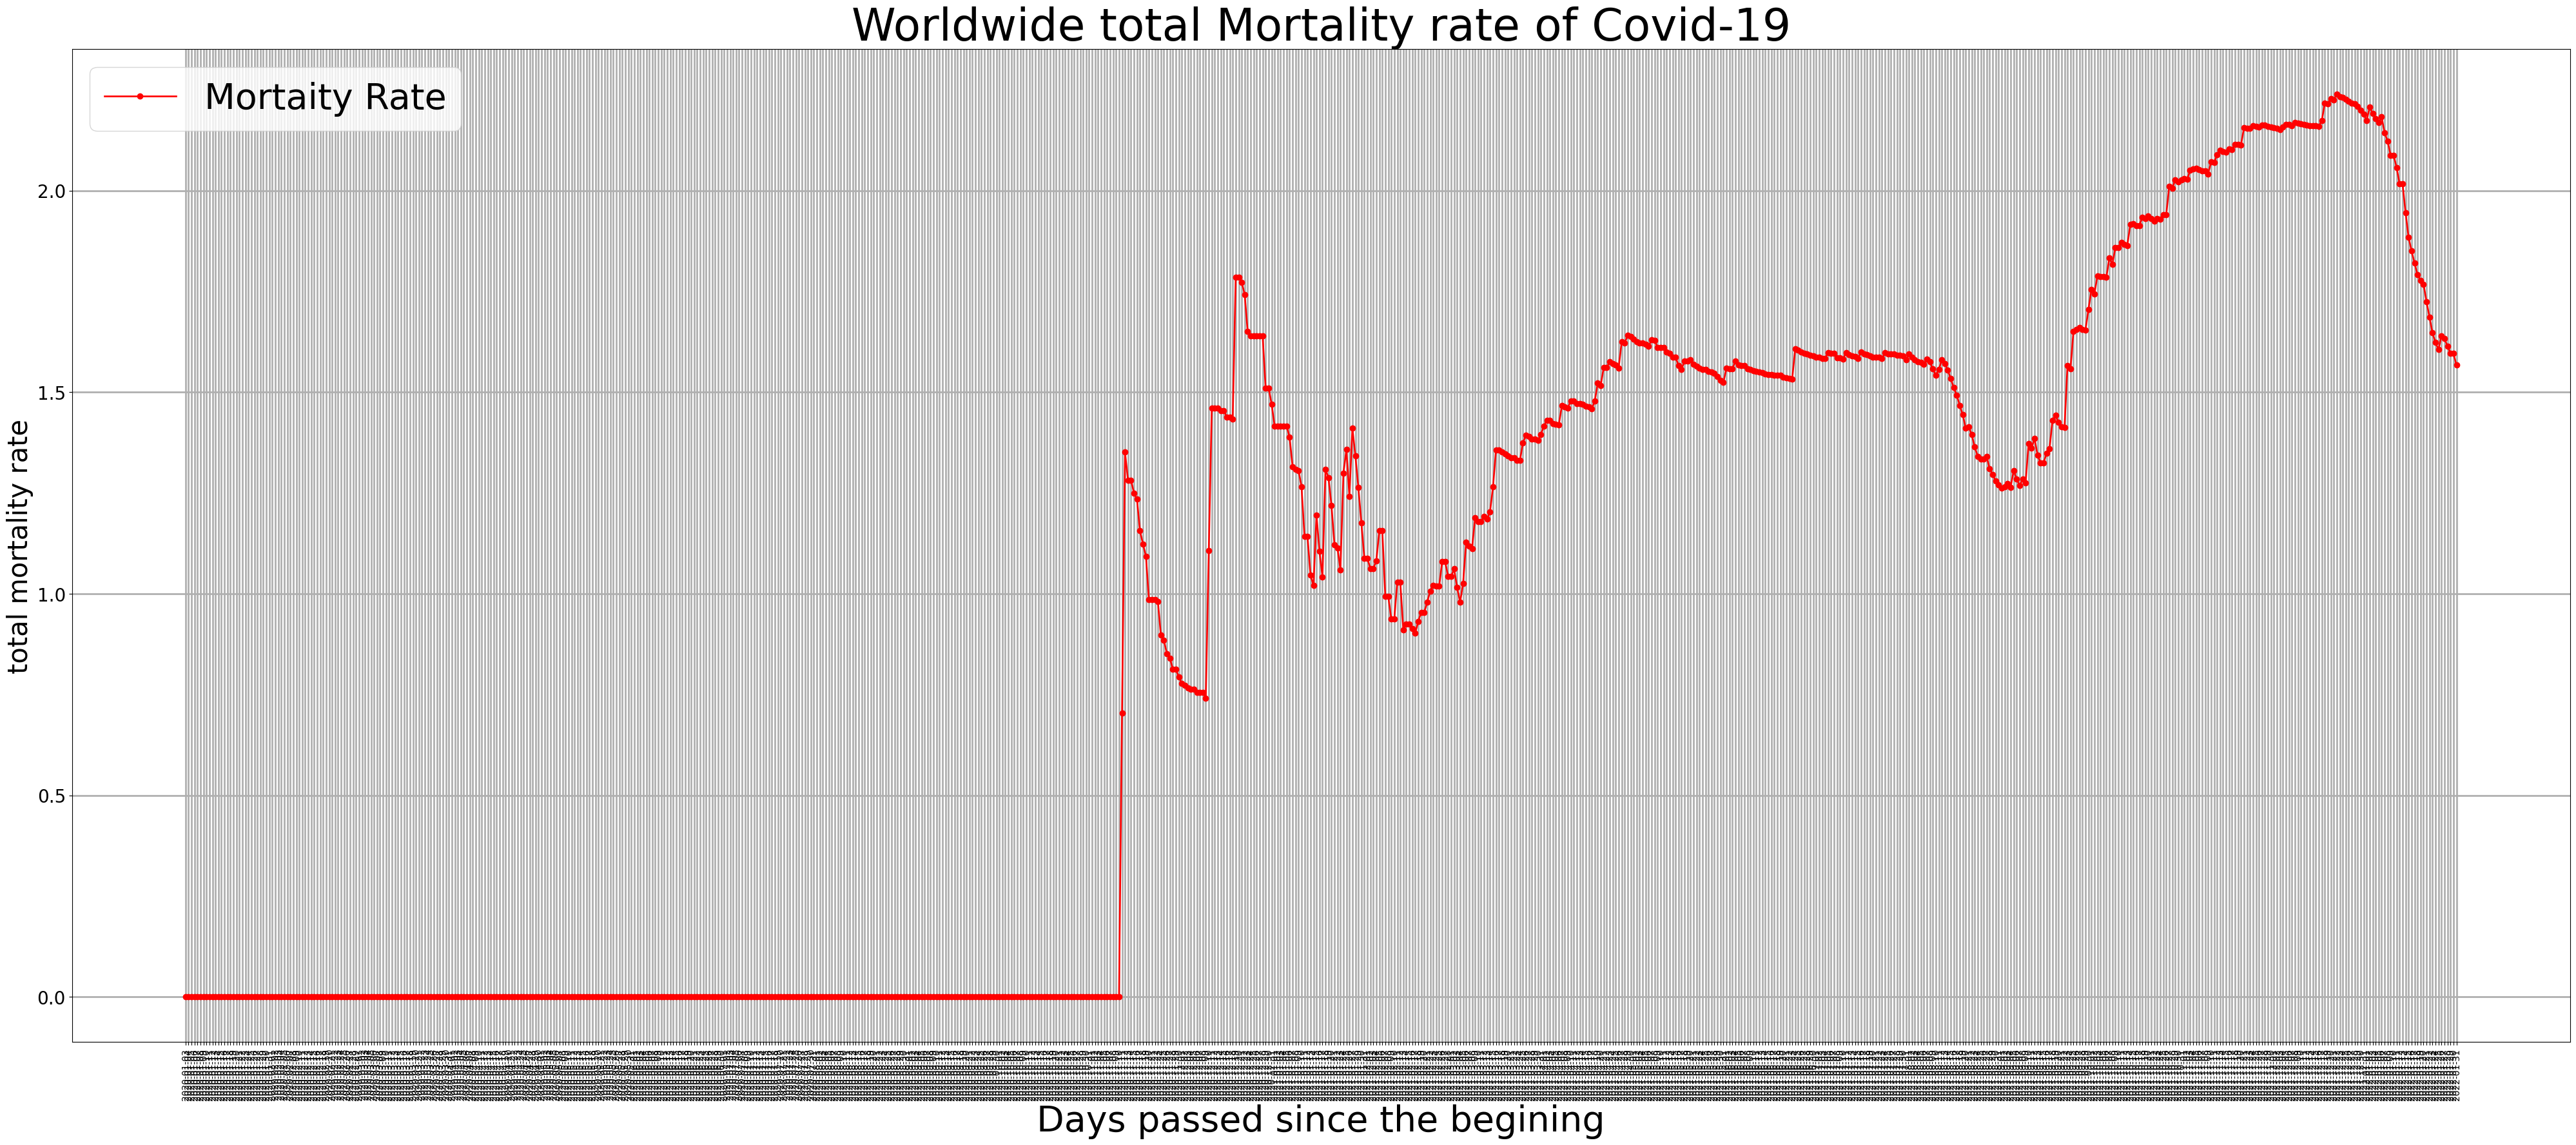

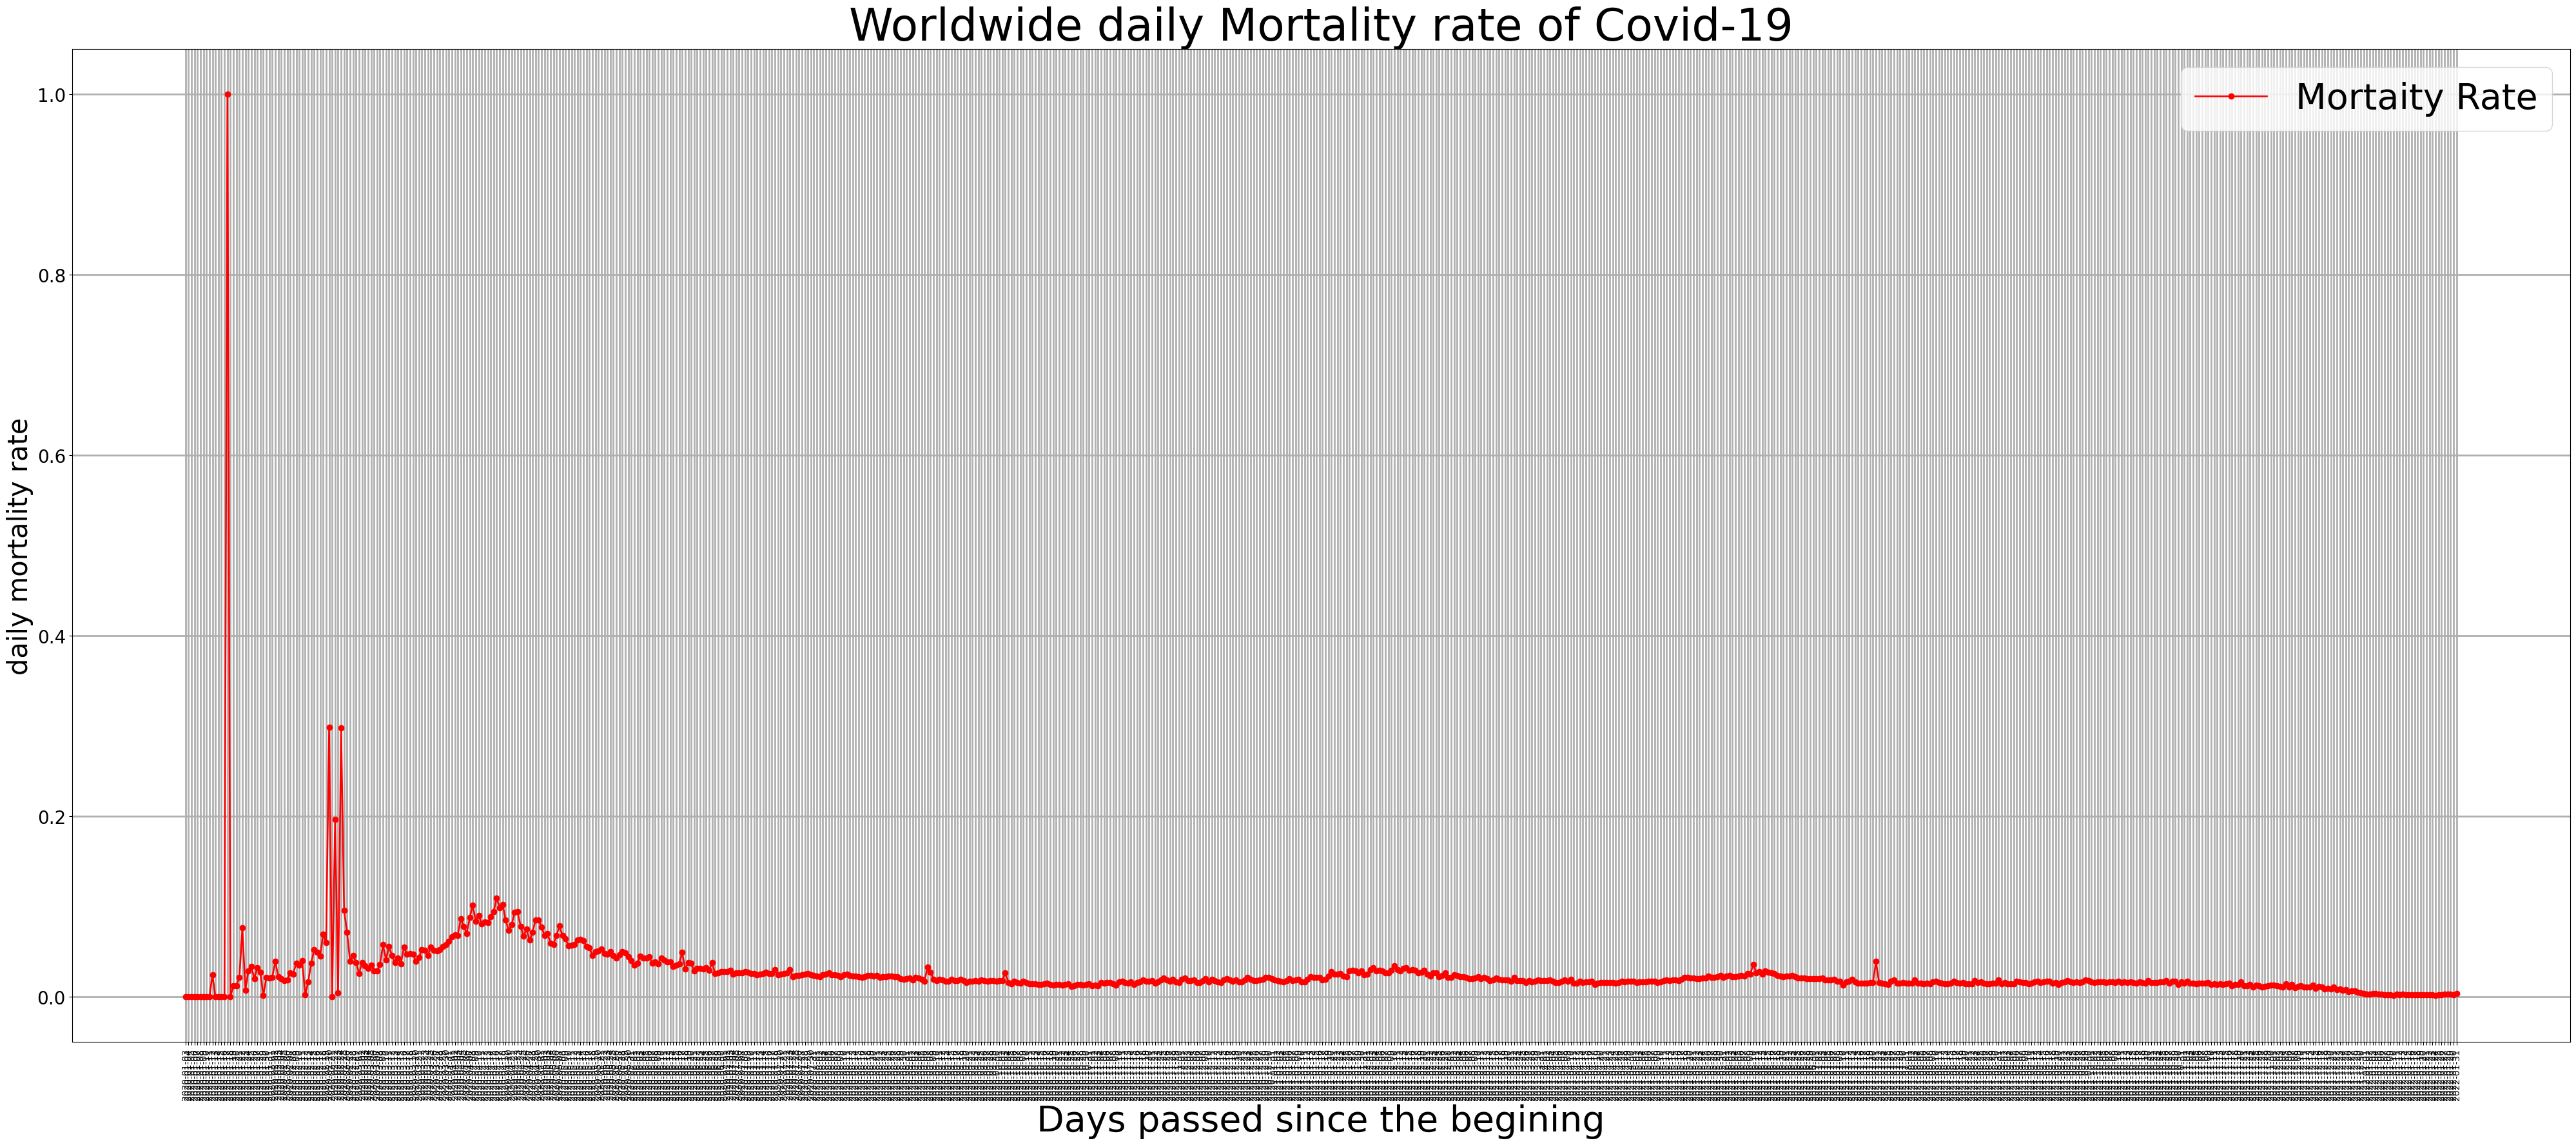

In [29]:
vis.plot_WorldMR(Dates_reported, Overall_per_country[181][7],"total")
vis.plot_WorldMR(Dates_reported,M_R_global_per_day, "daily")

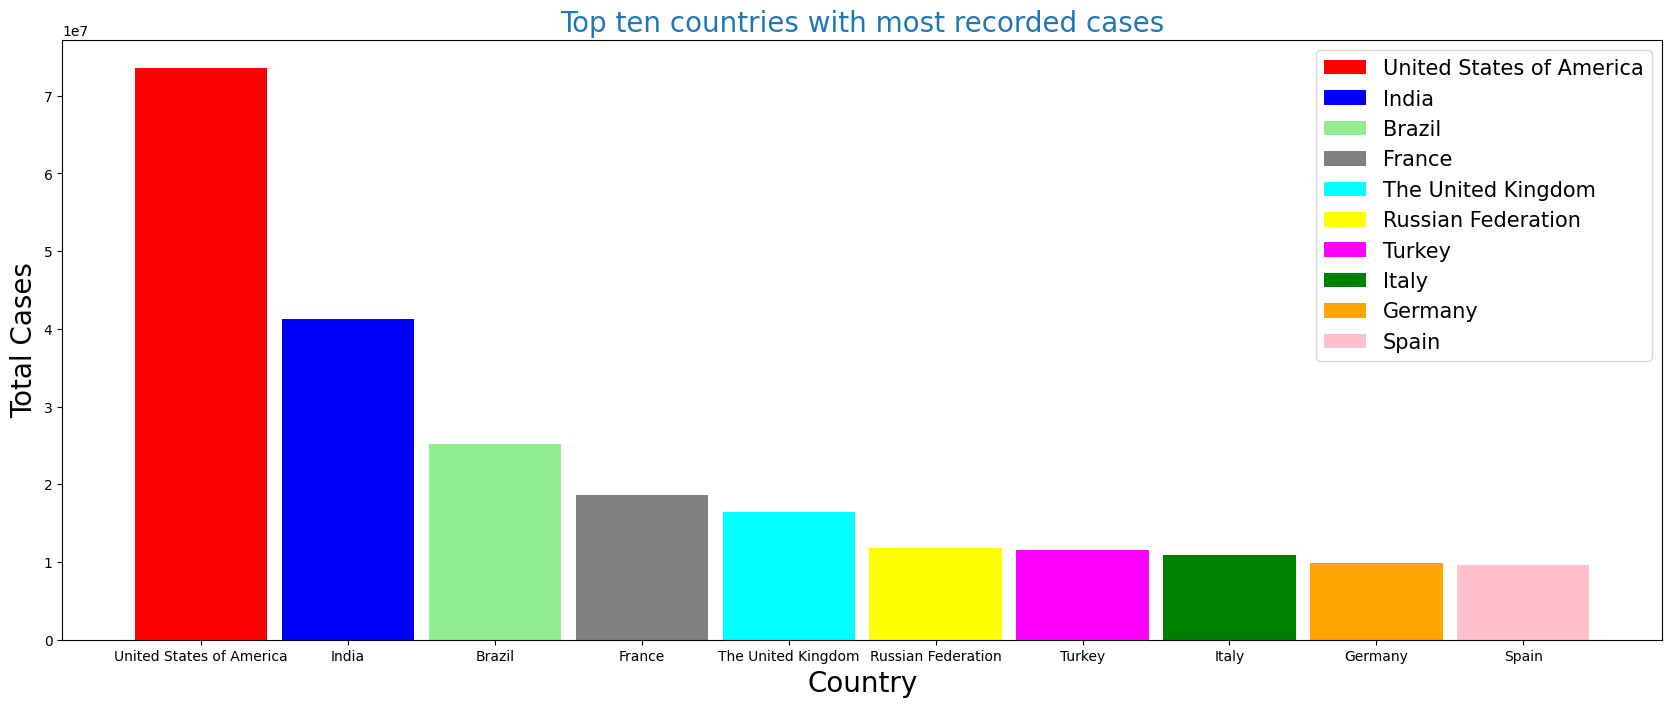

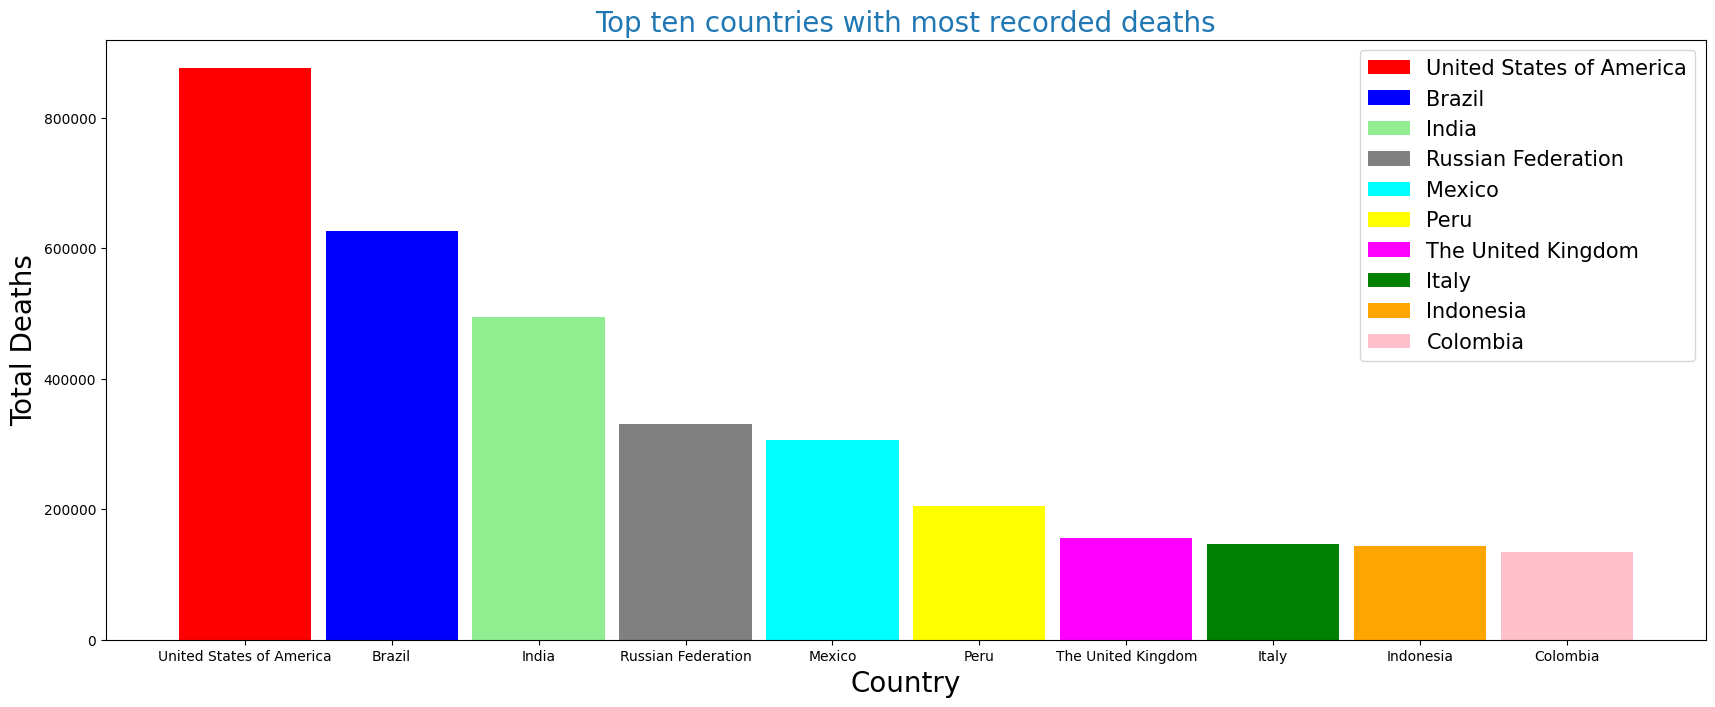

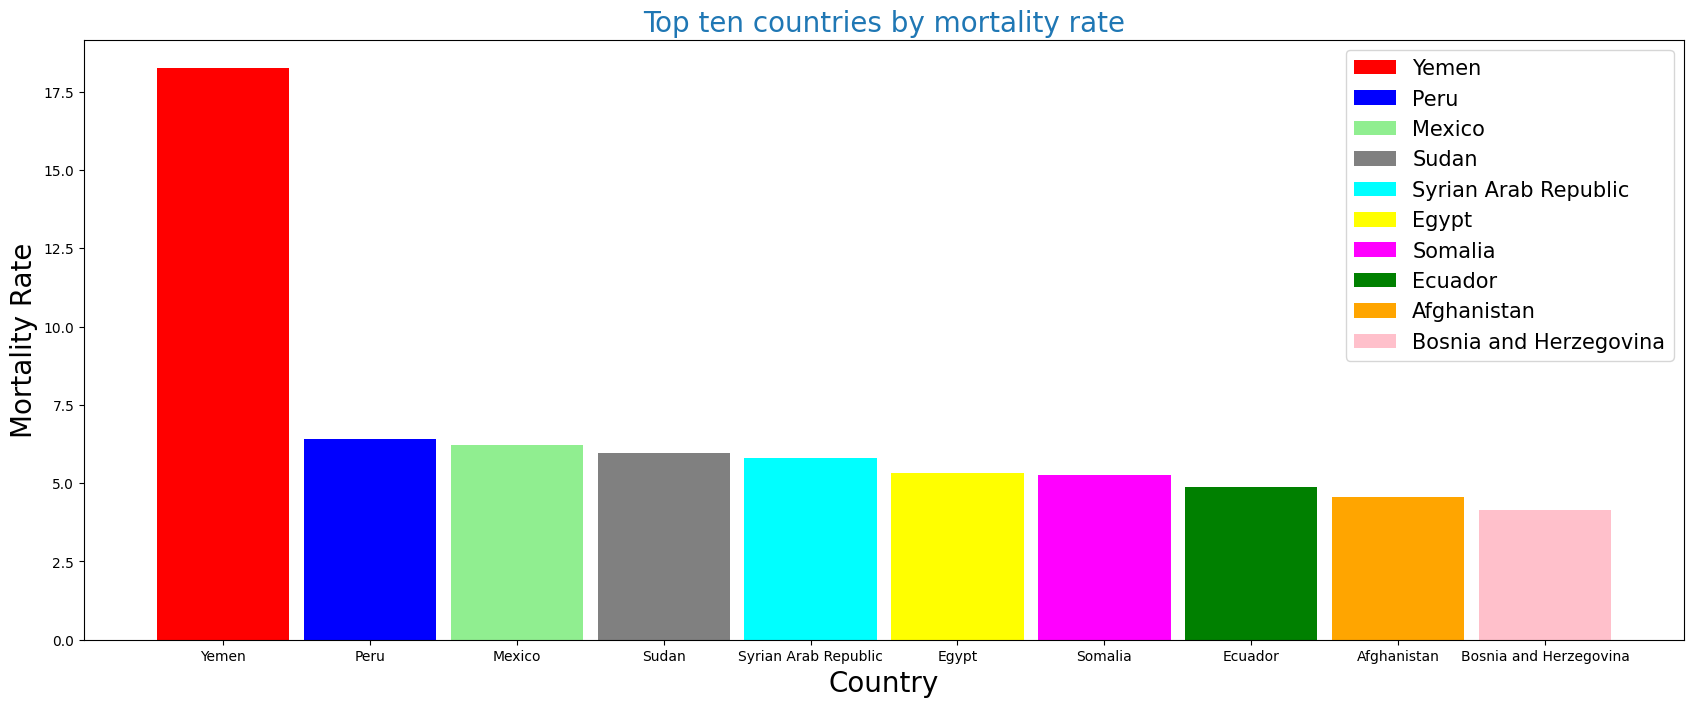

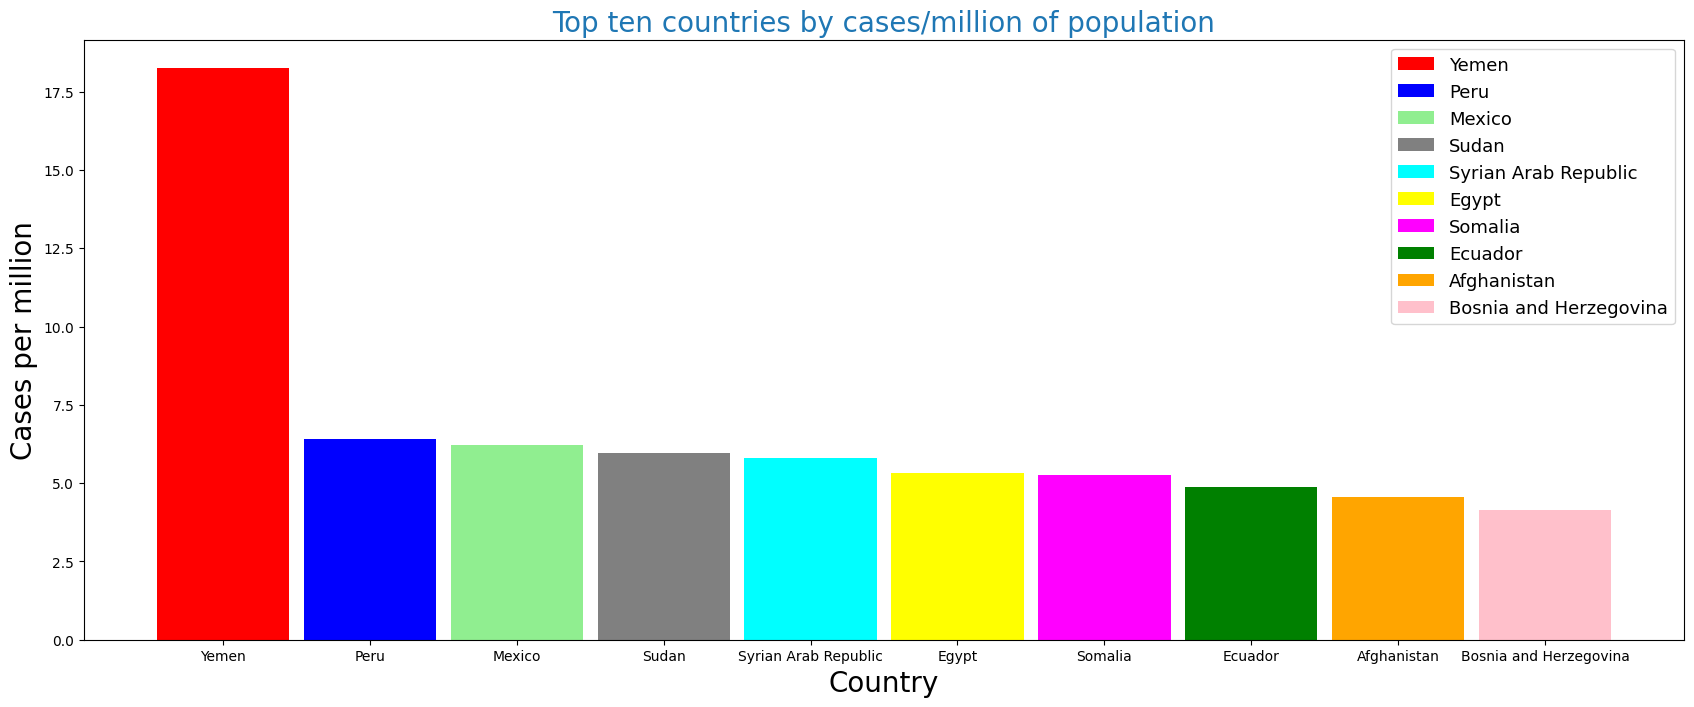

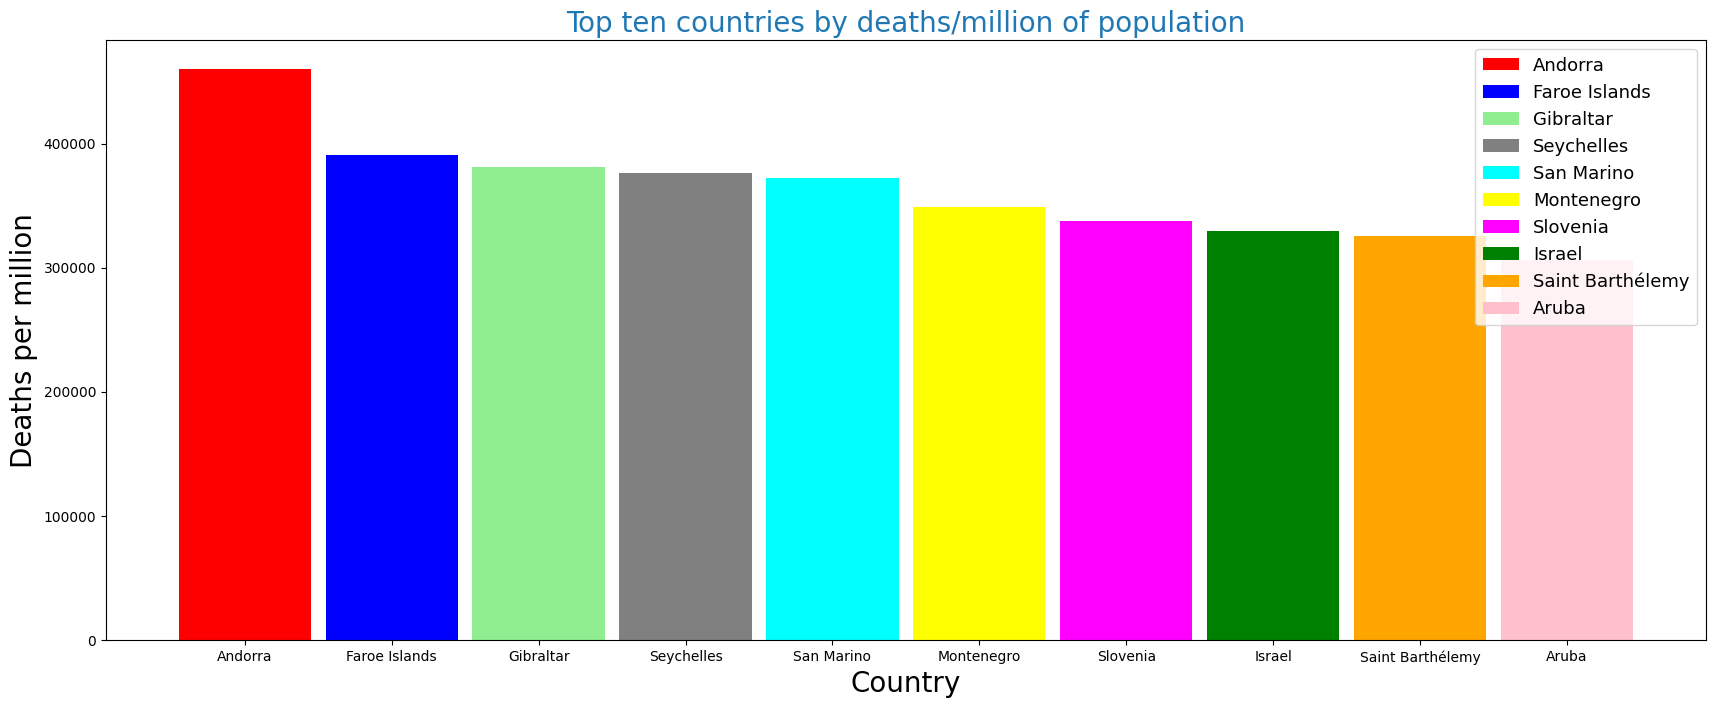

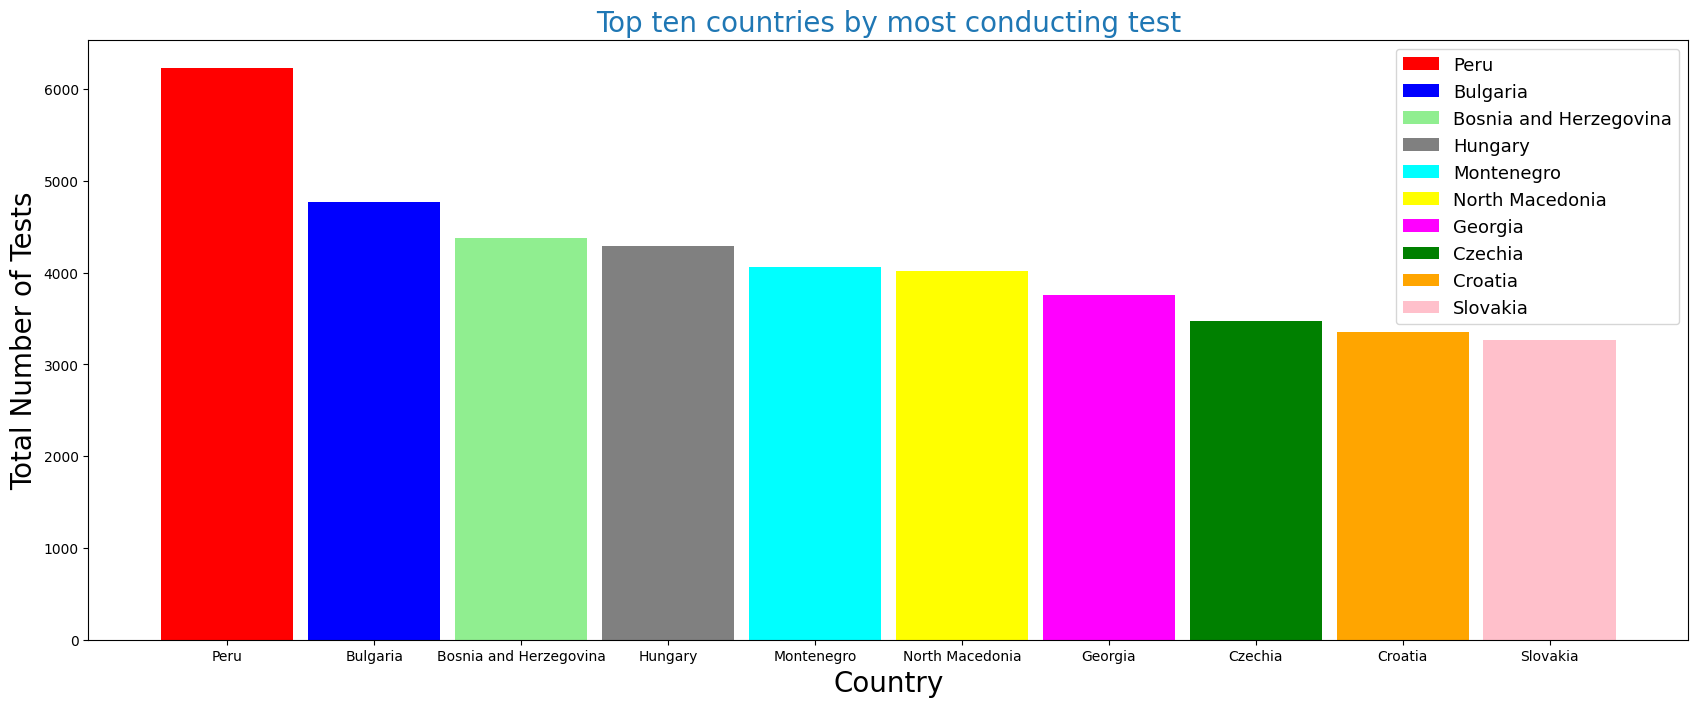

In [30]:
vis.plot_top10(Overall_per_country,1,'with most recorded cases','Total Cases',15)
vis.plot_top10(Overall_per_country,2,'with most recorded deaths','Total Deaths',15)
vis.plot_top10(Overall_per_country,4,'by mortality rate','Mortality Rate',15)
vis.plot_top10(Overall_per_country,4,'by cases/million of population','Cases per million',13)
vis.plot_top10(Overall_per_country,5,'by deaths/million of population','Deaths per million',13)
vis.plot_top10(Overall_per_country,6,'by most conducting test','Total Number of Tests',13)

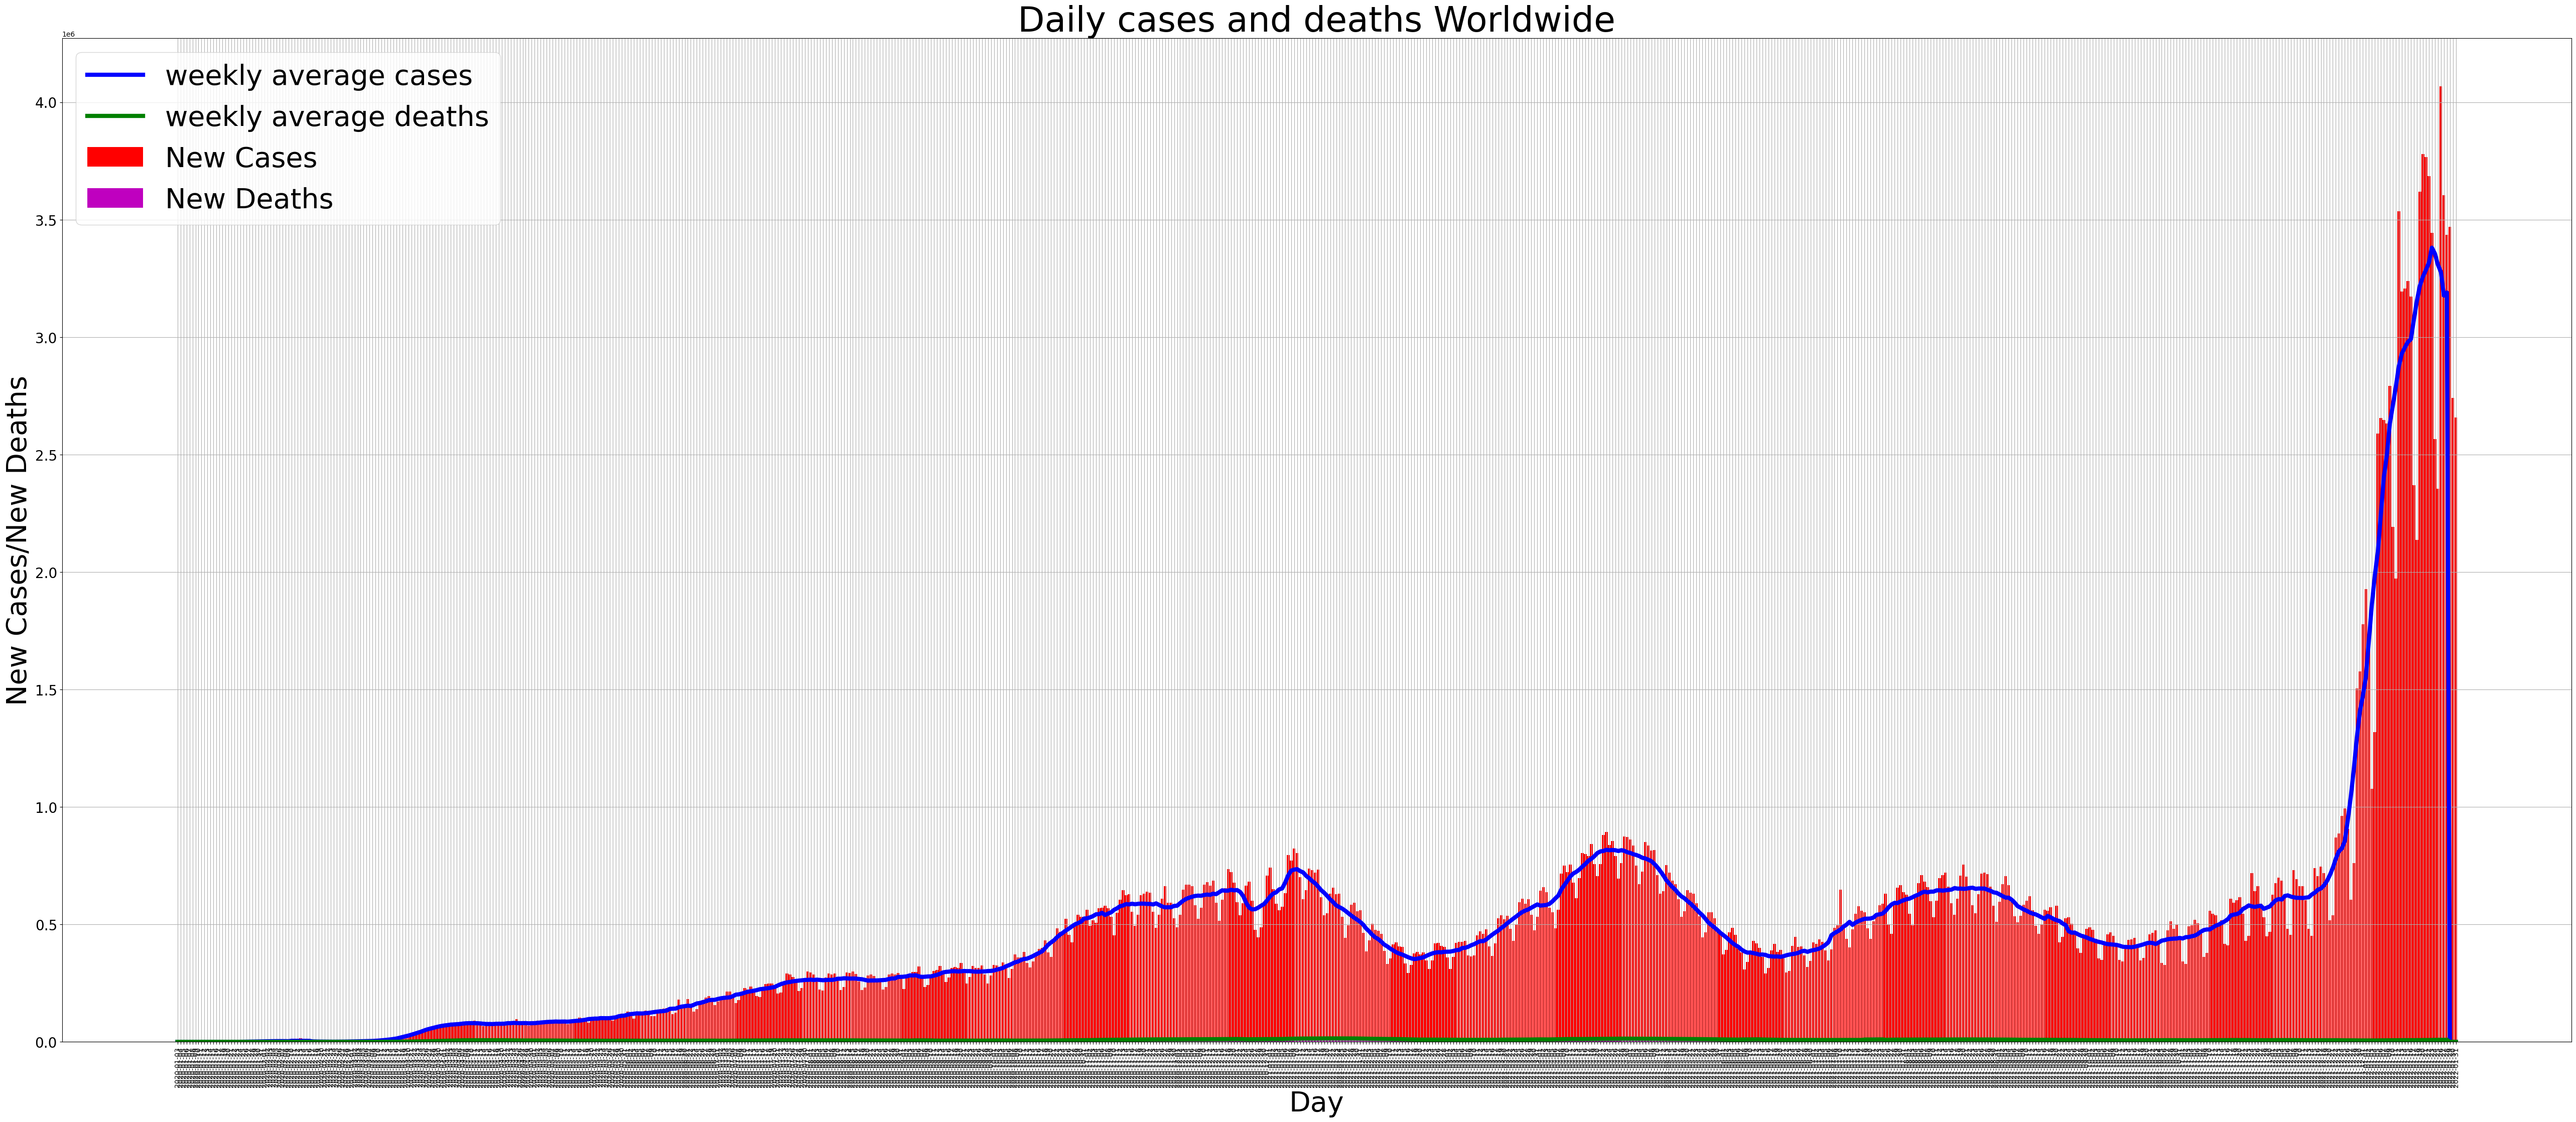

In [34]:
weekly_deaths = sub.moving_av(Daily_World_deaths,7)
weekly_cases = sub.moving_av(Daily_World_cases,7)
vis.plot_daily(Dates_reported,Daily_World_cases,Daily_World_deaths,weekly_cases,weekly_deaths,'Worldwide')

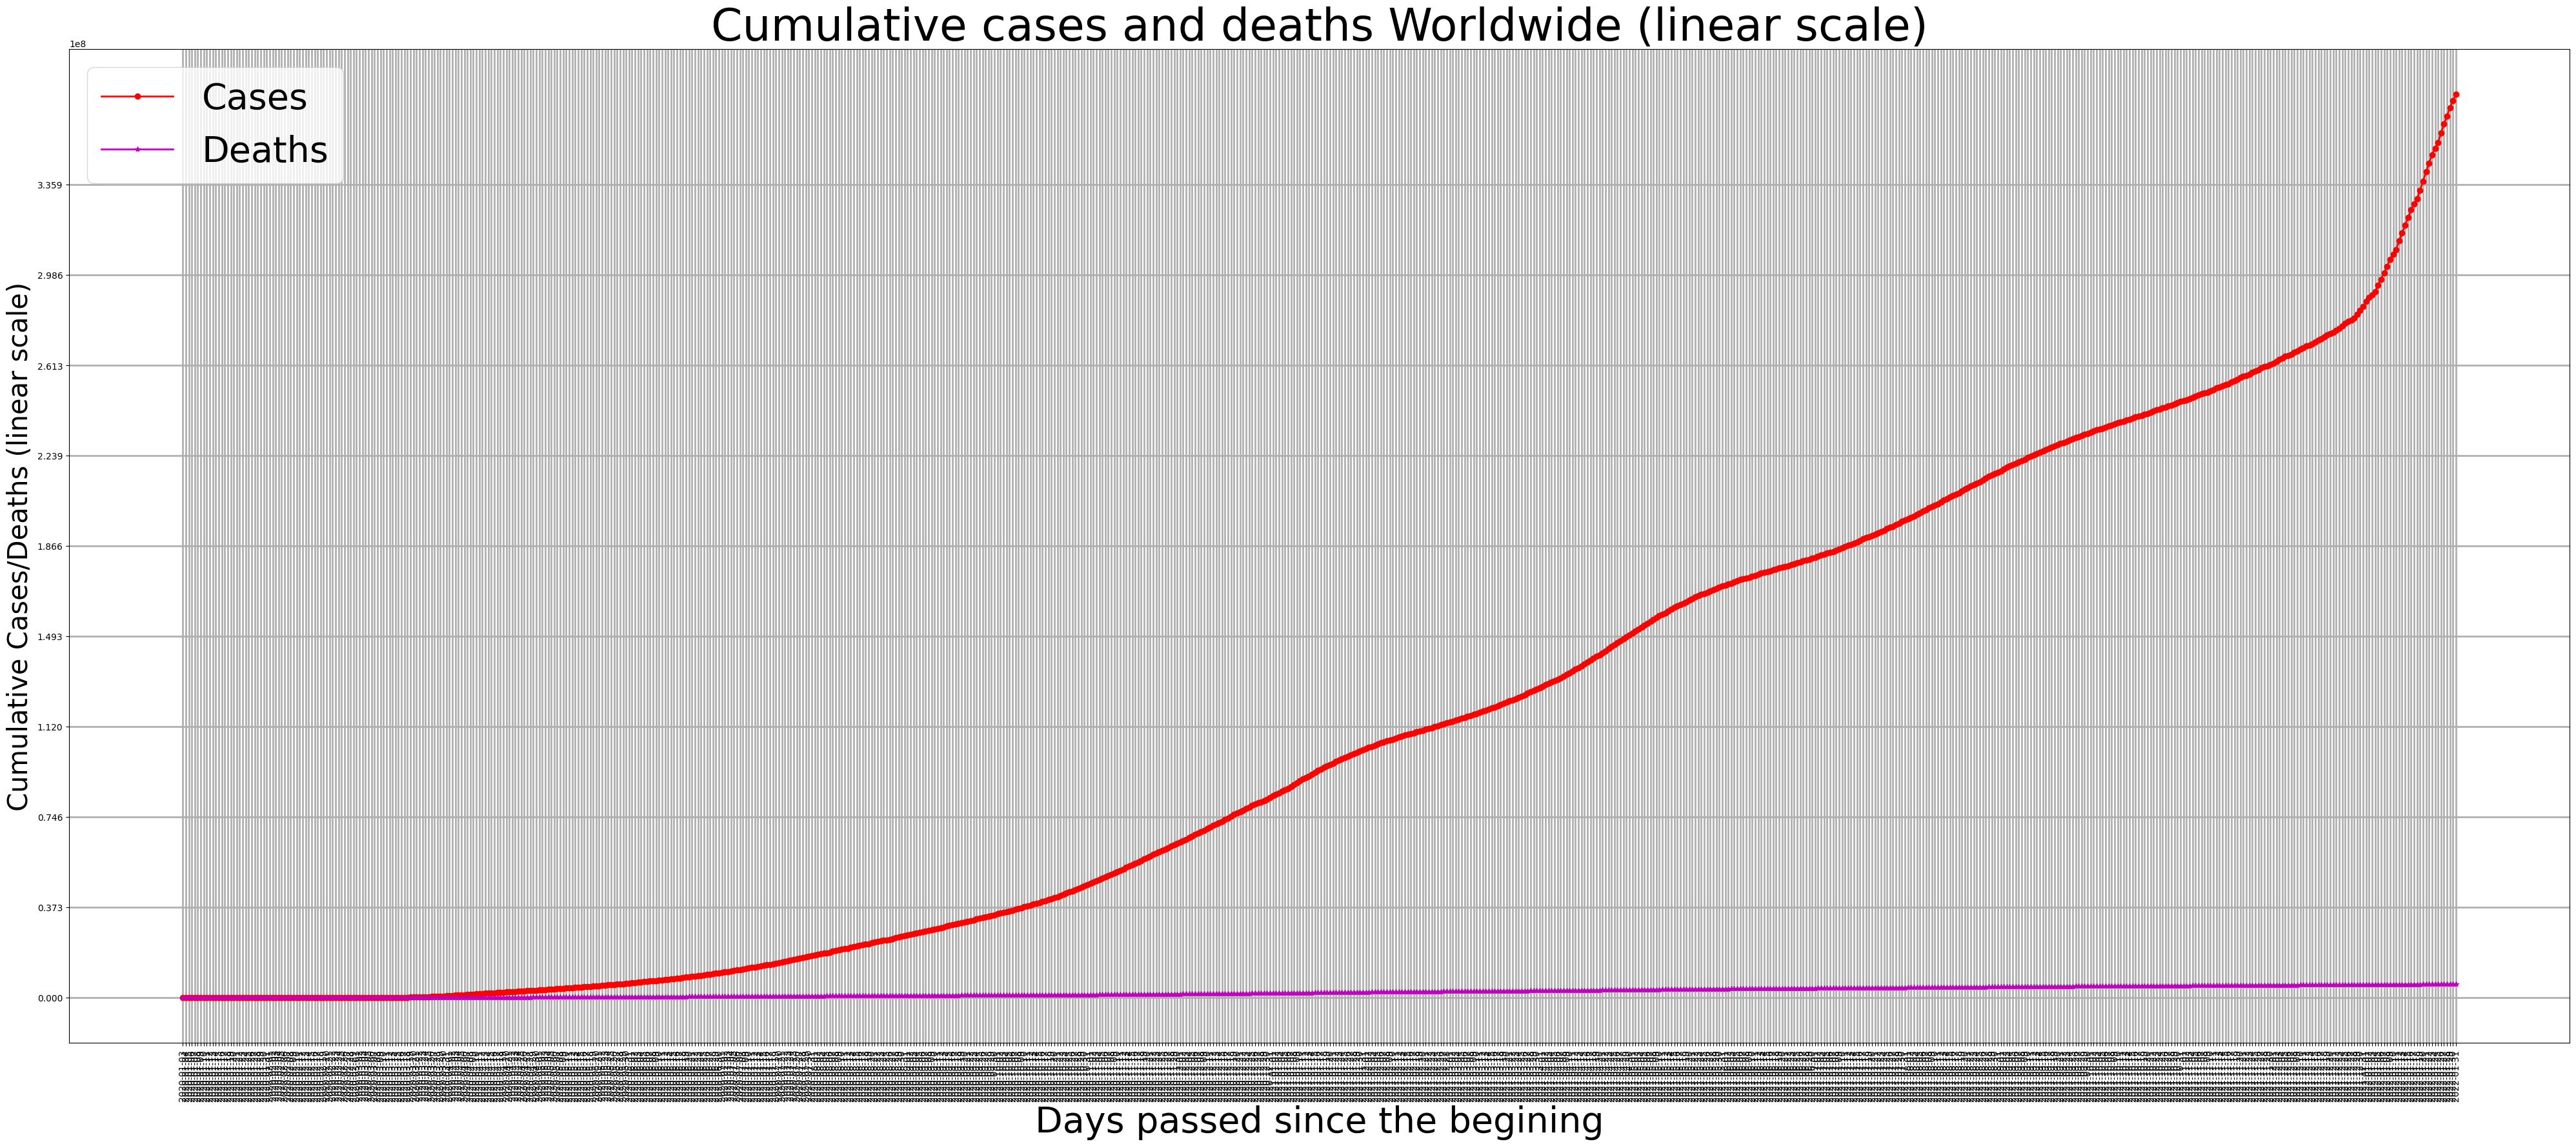

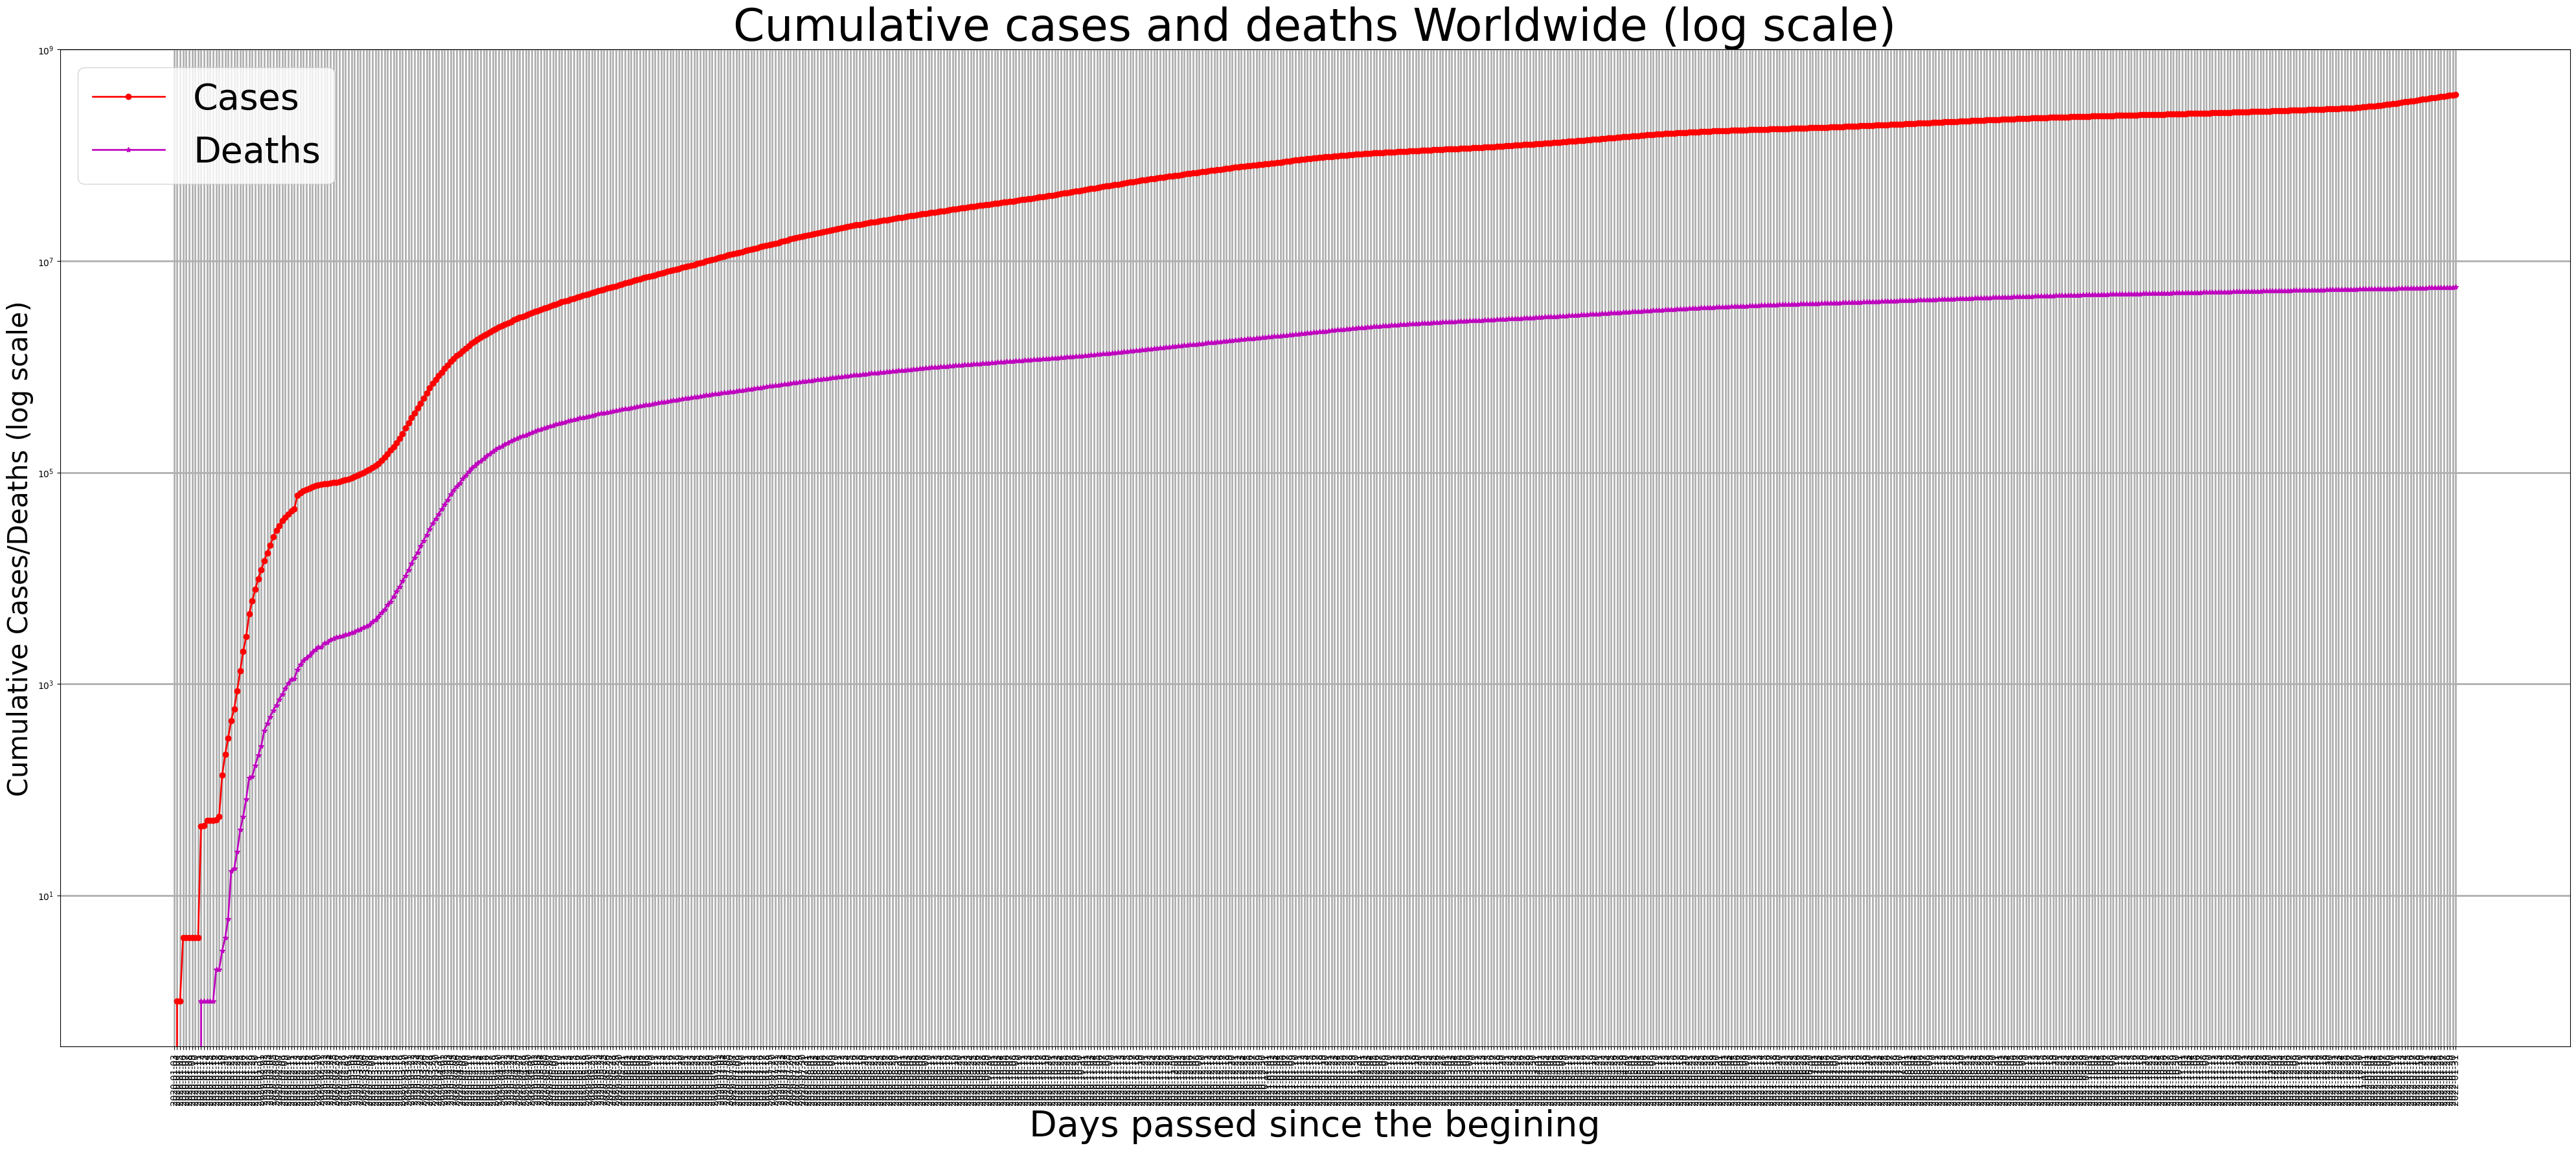

In [35]:
vis.plot_cumulative(Dates_reported,World_cases,World_deaths,"Worldwide","linear",1)
vis.plot_cumulative(Dates_reported,World_cases,World_deaths,"Worldwide","log",1)

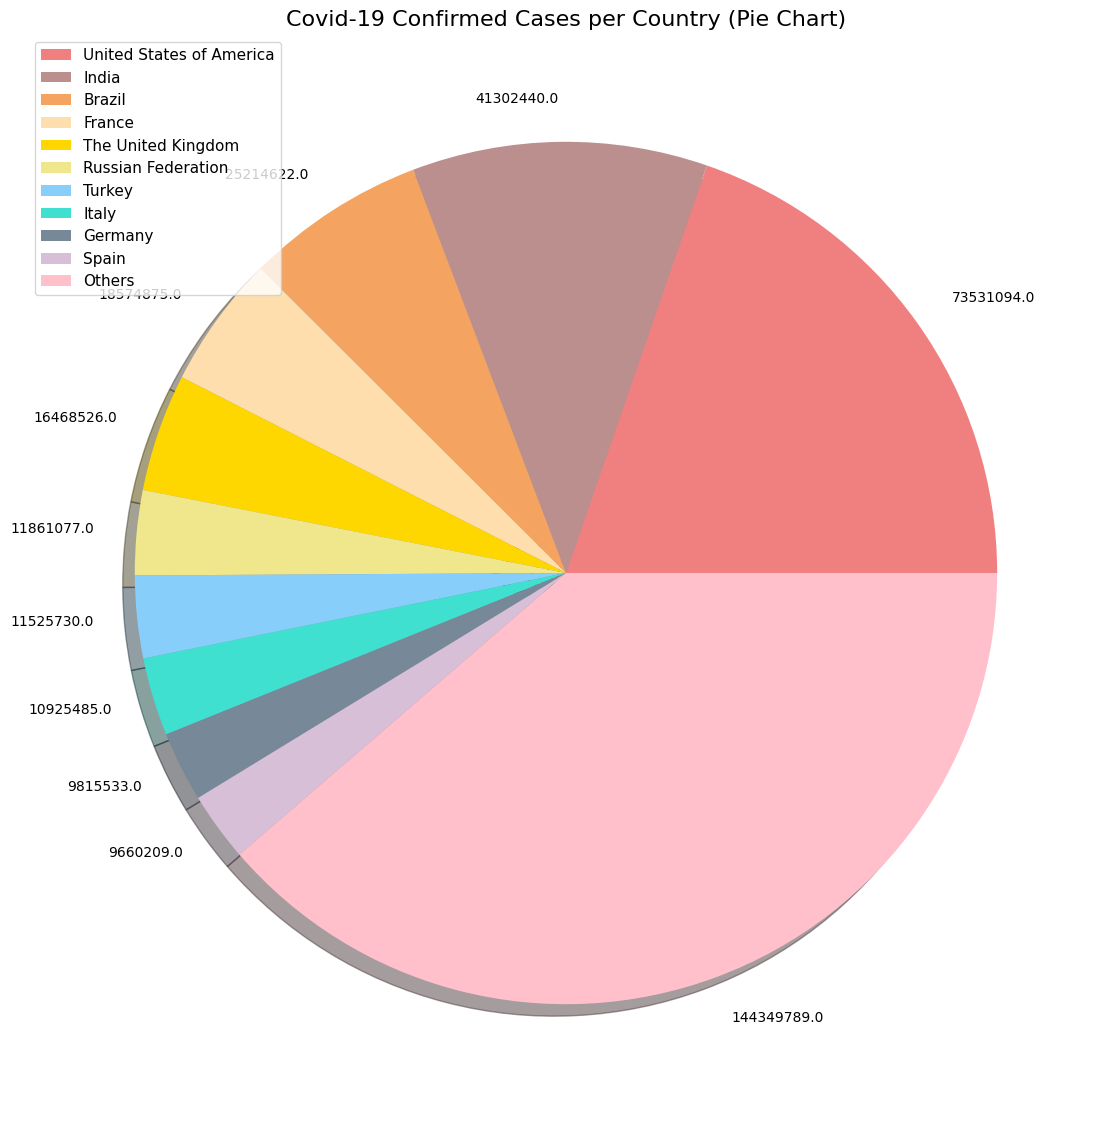

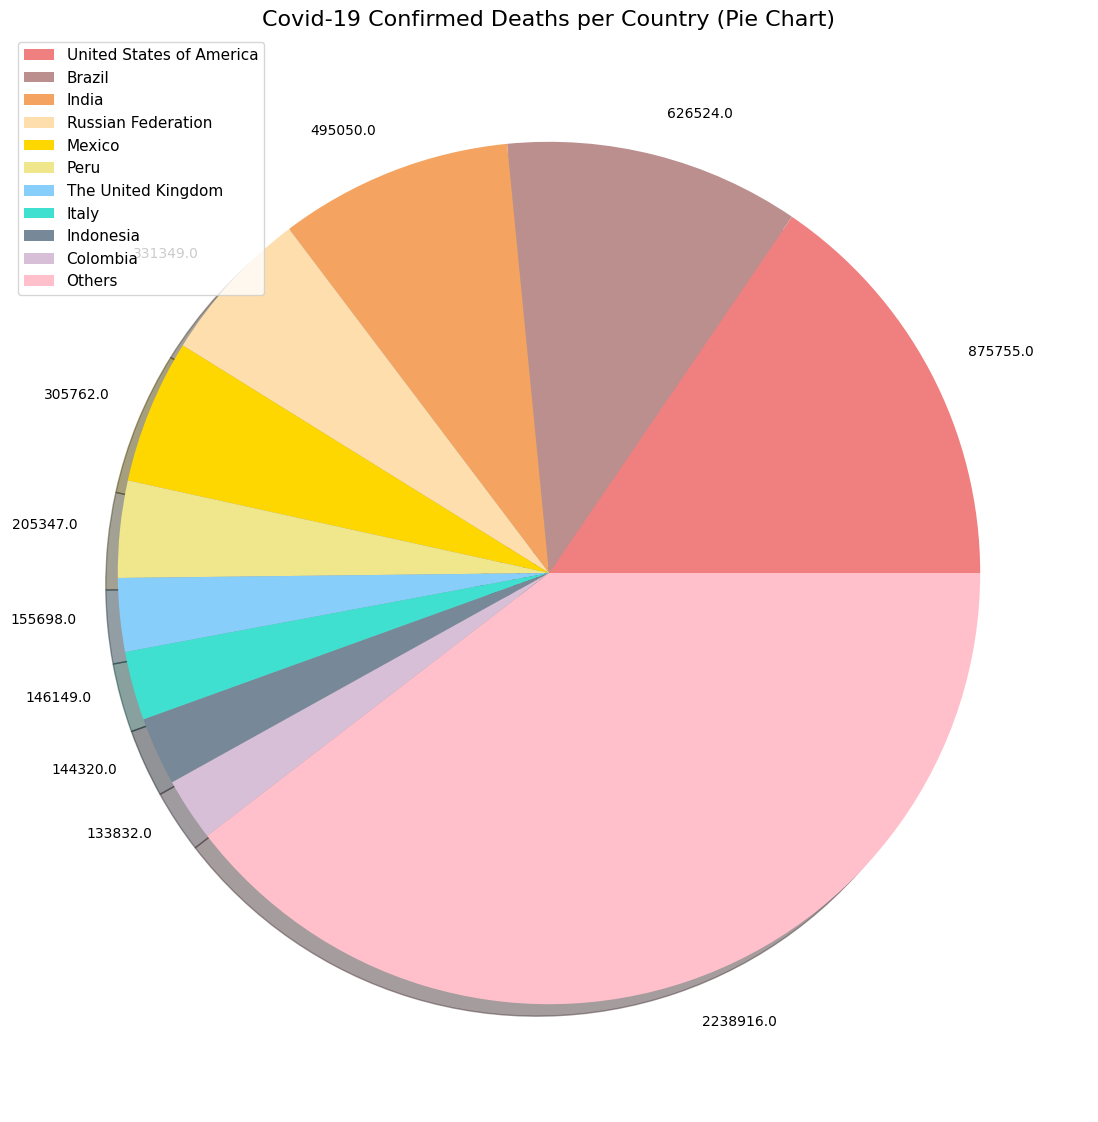

In [36]:
vis.plot_pie_charts(countries,Overall_per_country, 1, 'Covid-19 Confirmed Cases per Country (Pie Chart)')
vis.plot_pie_charts(countries,Overall_per_country, 2, 'Covid-19 Confirmed Deaths per Country (Pie Chart)')

In [37]:
heat_table = vis.Heat_Table(Overall_per_country)
heat_table

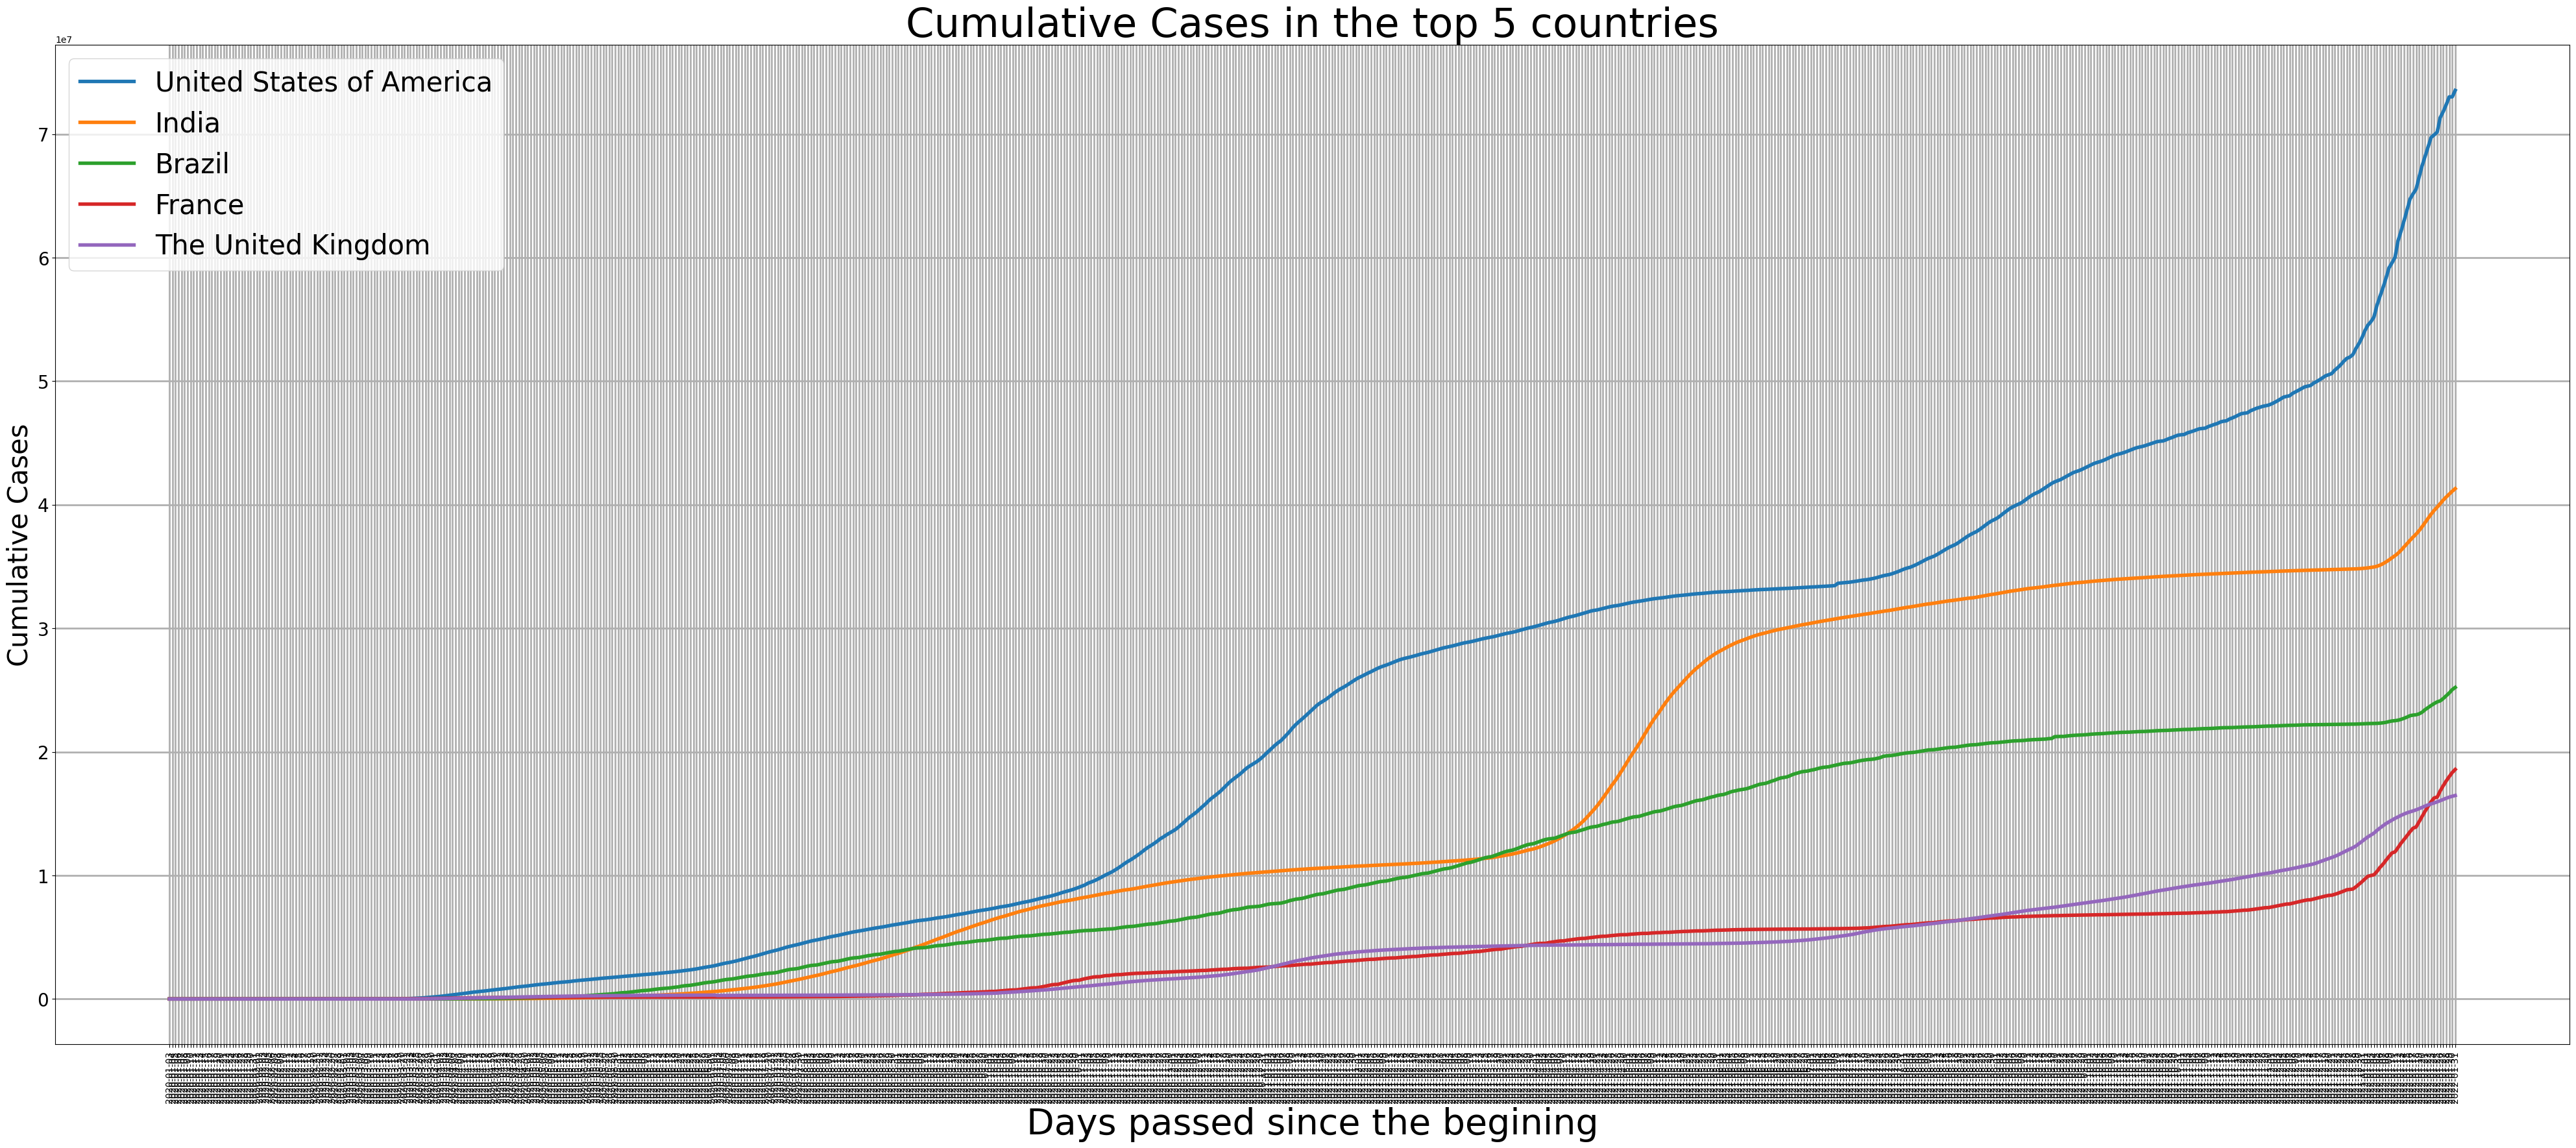

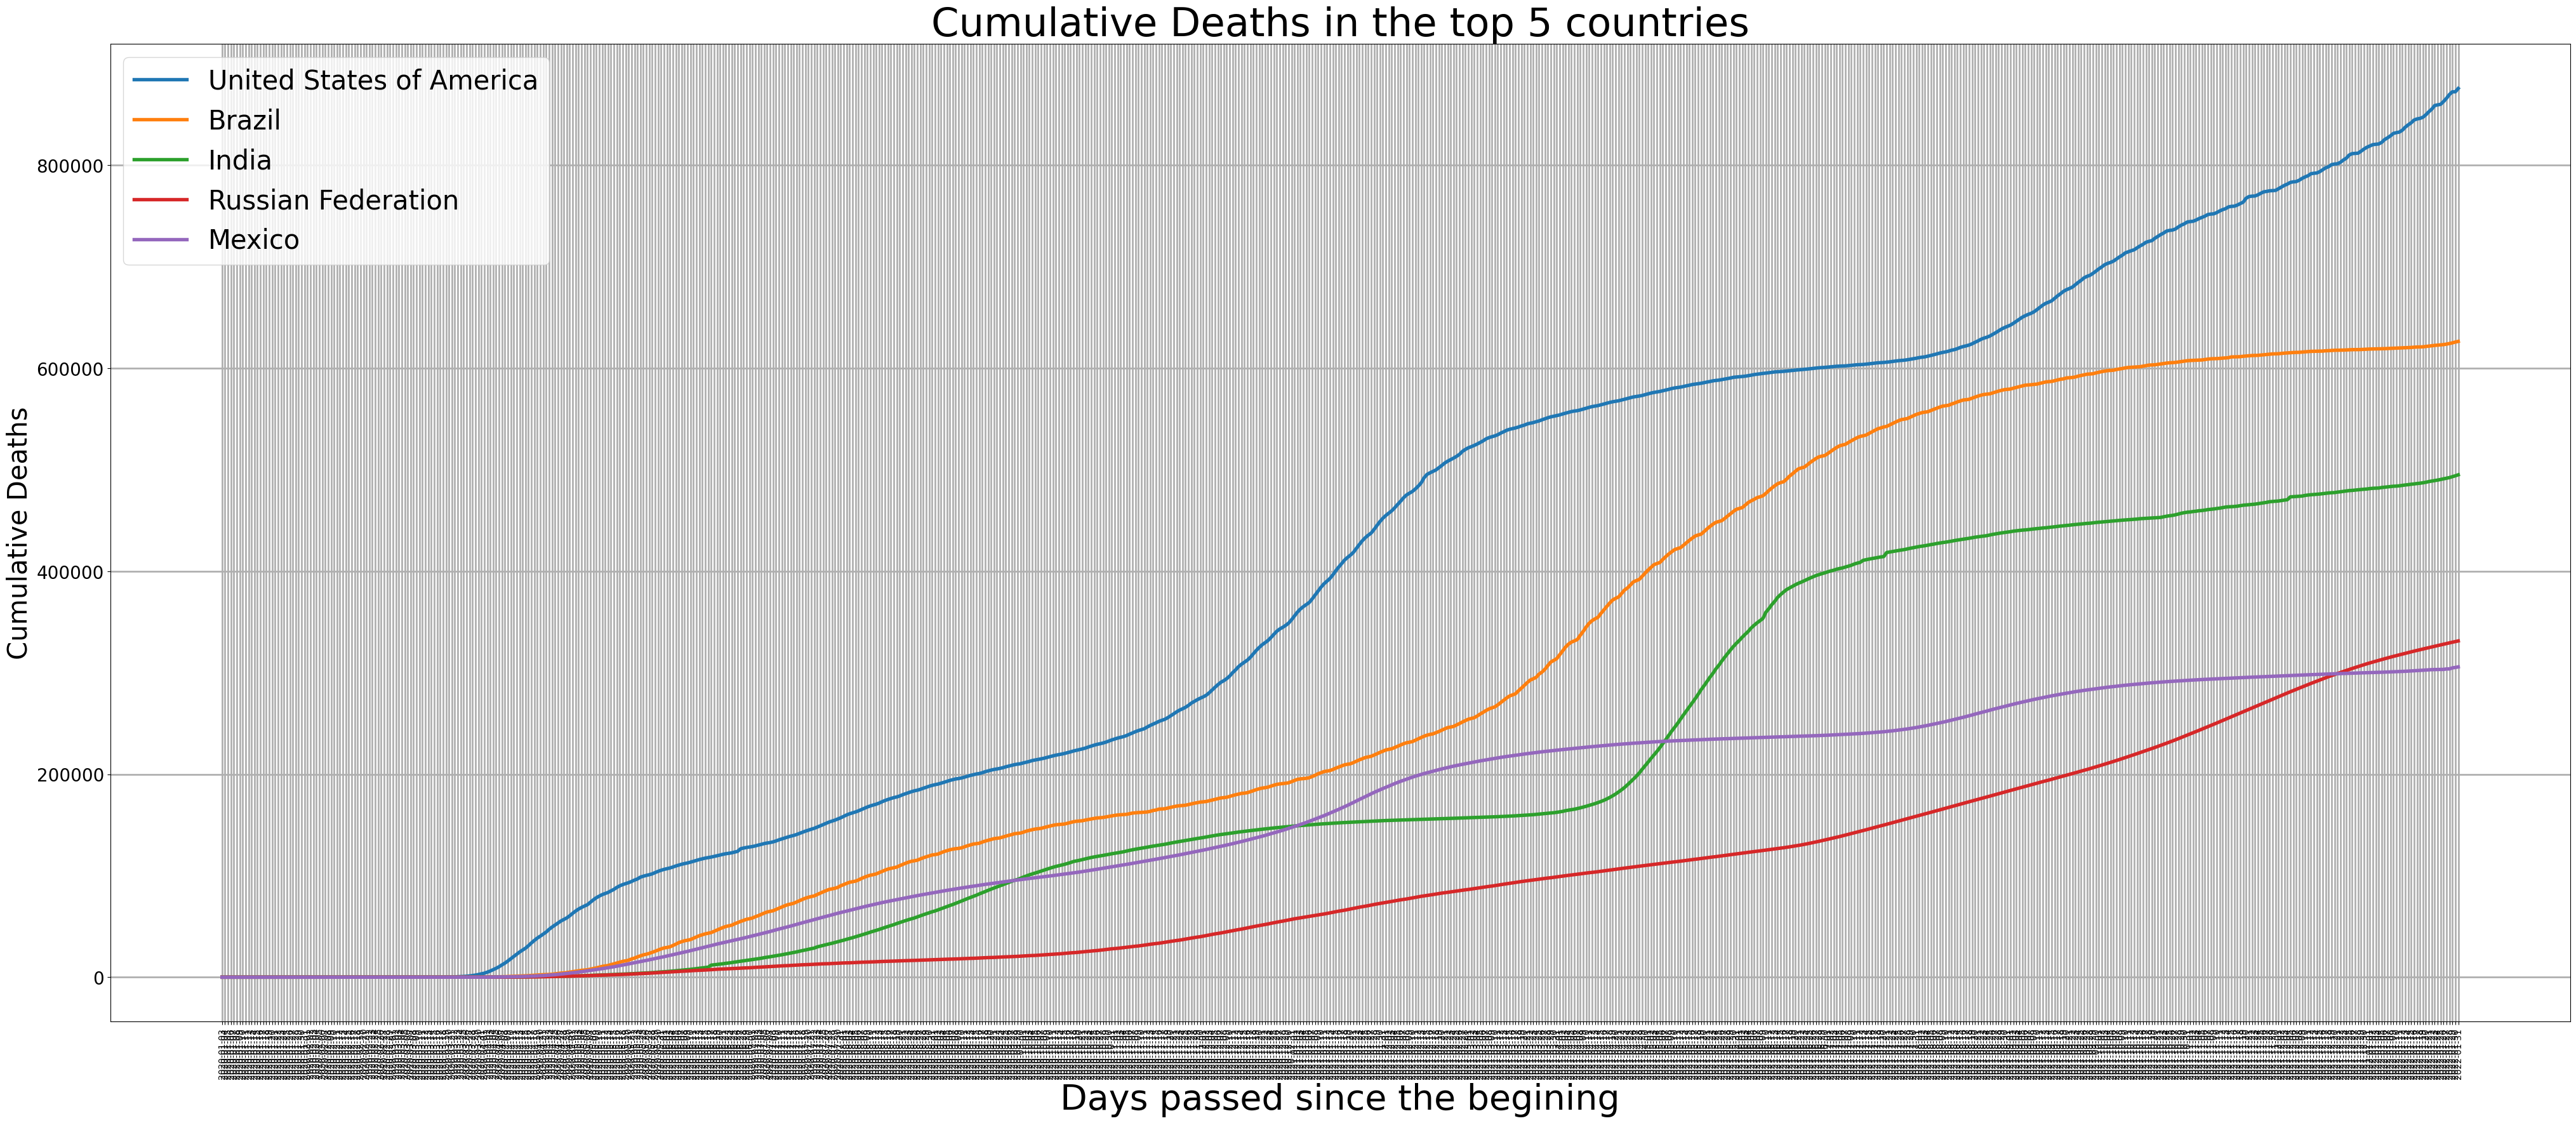

In [38]:
vis.plot_top5(Dates_reported,Cumulative_cases,Overall_per_country,-1,1,"Cases")
vis.plot_top5(Dates_reported,Cumulative_deaths,Overall_per_country,-1,2,"Deaths")

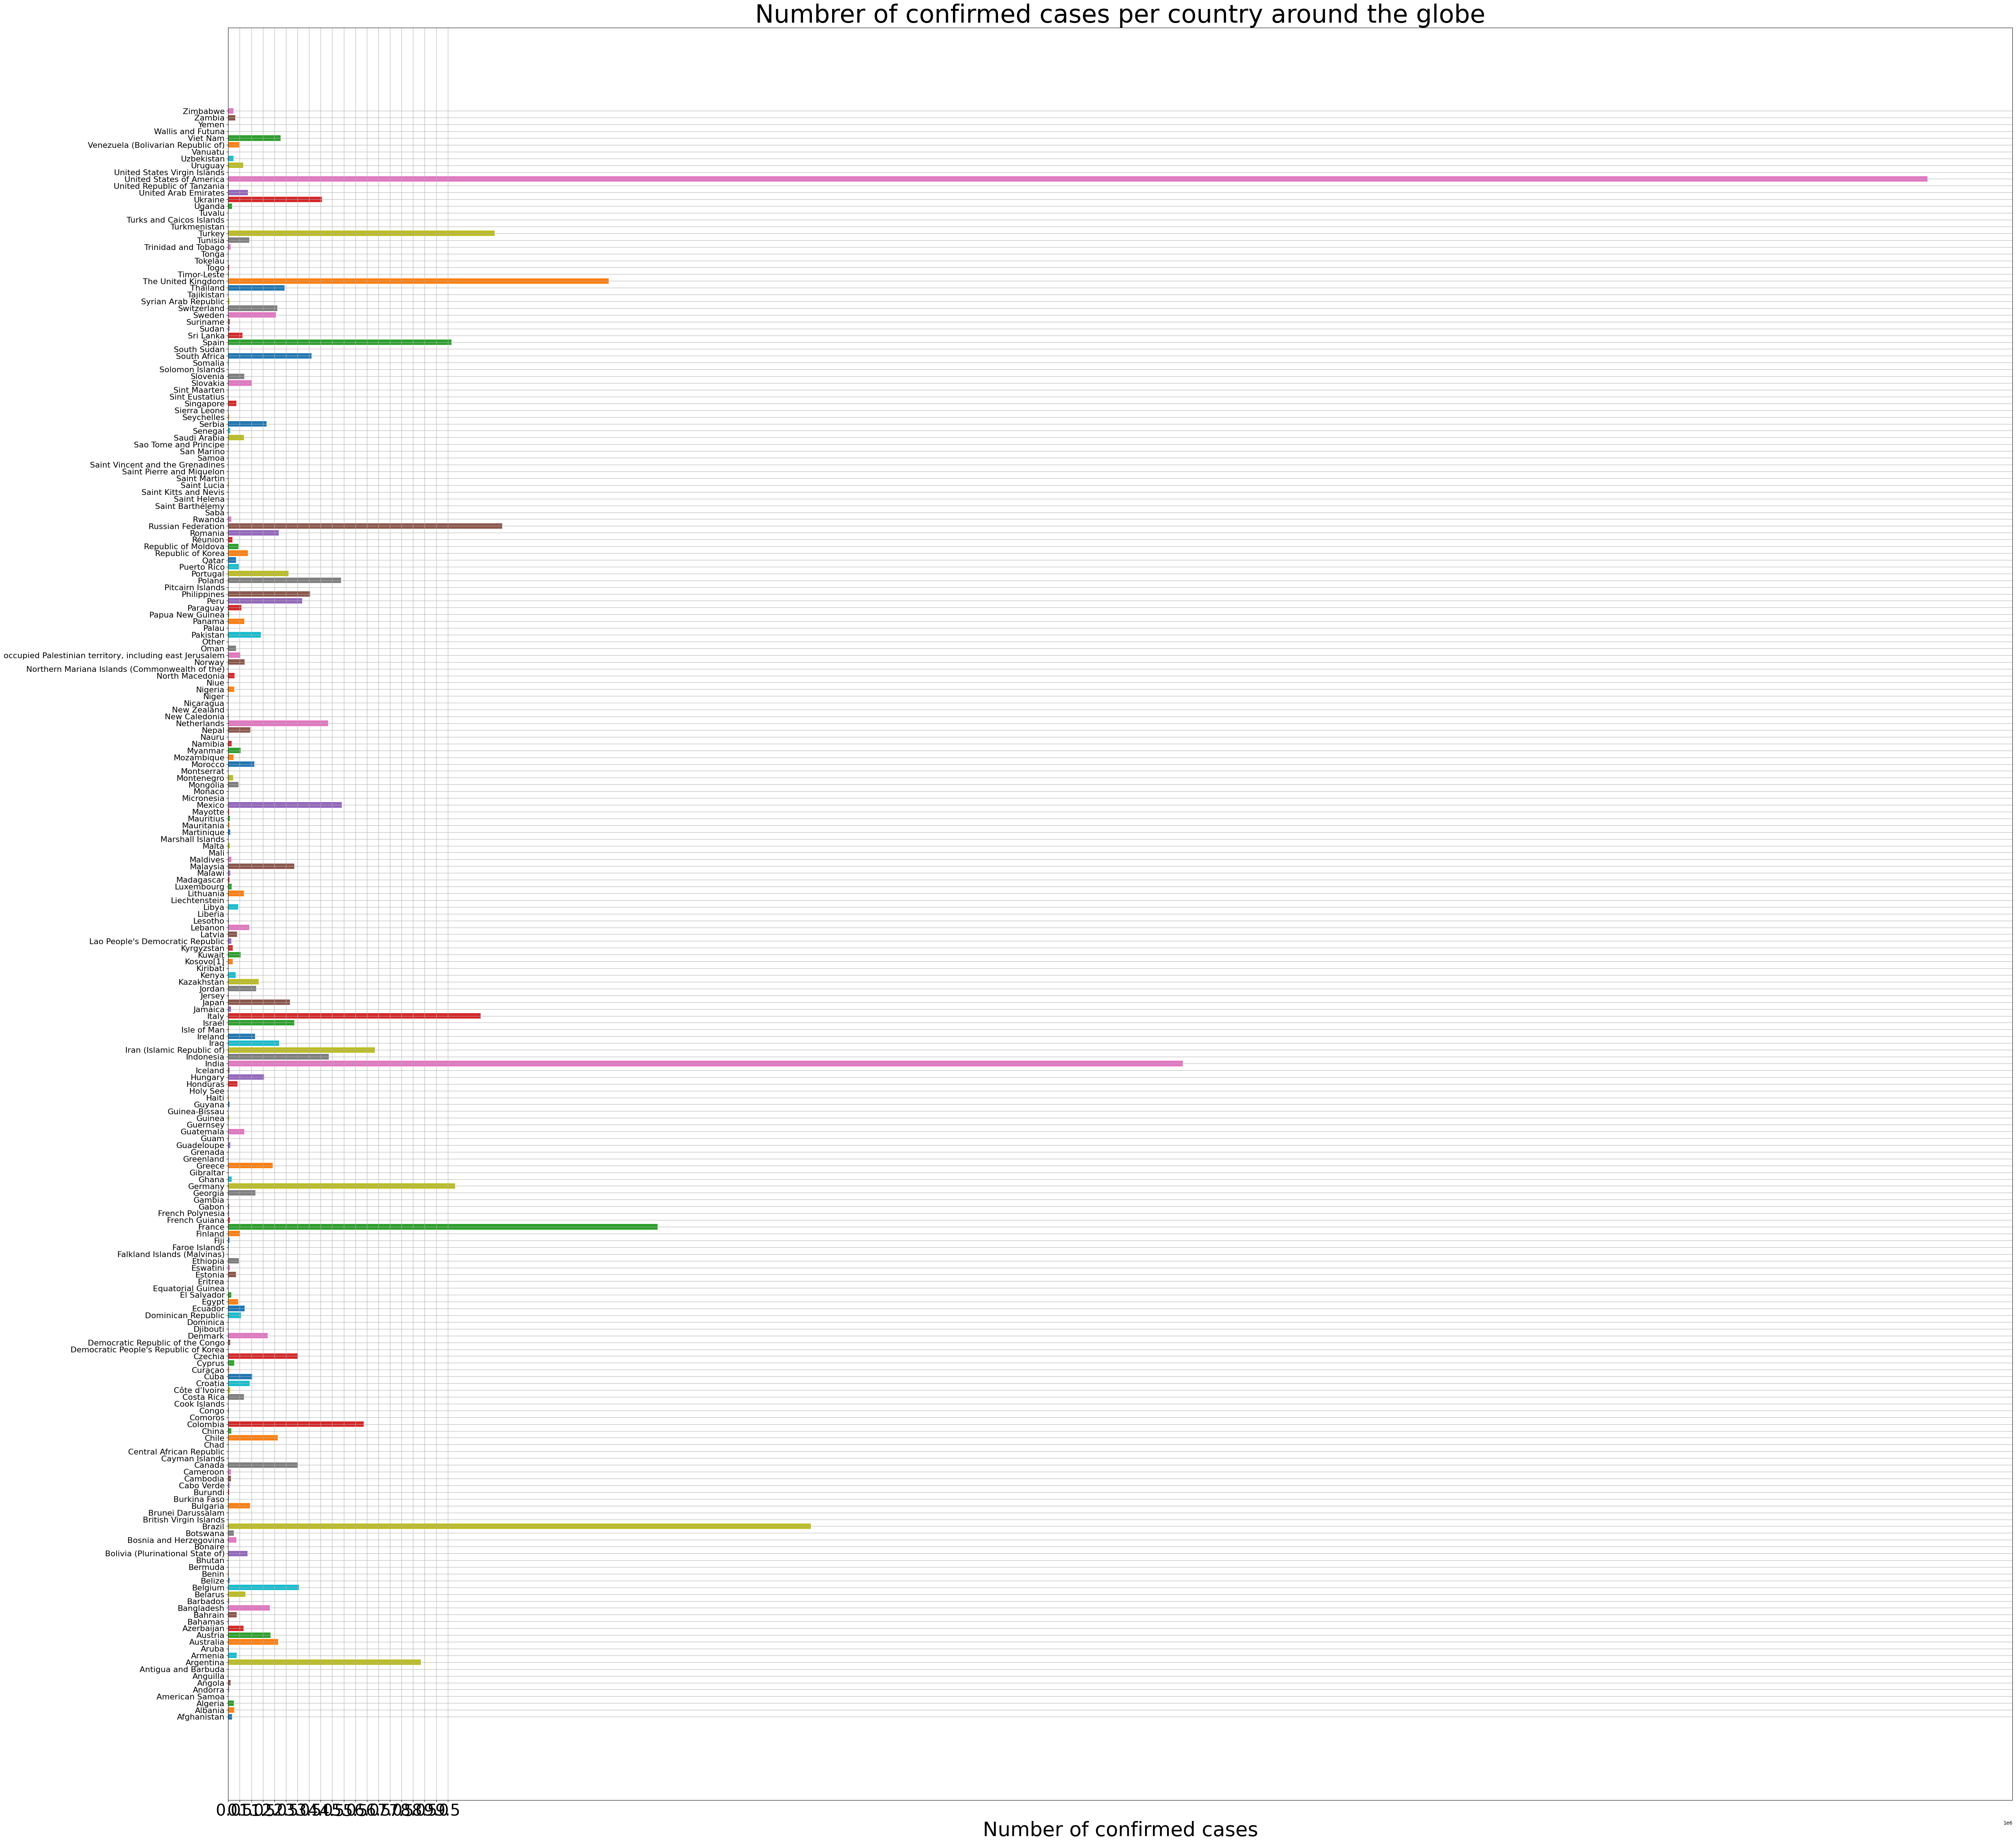

In [39]:
vis.plot_horizontal_bars(countries,Cumulative_cases)

## A.5: Prediction with Casual Methods

#### Using weighted averages

In [17]:
new_cases = np.copy(New_cases)
crv.Late_weighted_average(new_cases.tolist(),10,countries,10)

Afghanistan will have around [352, 360, 369, 373, 391, 385, 383, 386, 400, 395] the next ten days
Albania will have around [1544, 1475, 1463, 1445, 1481, 1459, 1479, 1475, 1476, 1481] the next ten days
Algeria will have around [1985, 1966, 1968, 1956, 1967, 1954, 1971, 1966, 1976, 1986] the next ten days
American Samoa will have around [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] the next ten days
Andorra will have around [307, 246, 252, 269, 278, 238, 242, 249, 240, 247] the next ten days
Angola will have around [189, 177, 176, 164, 150, 147, 149, 149, 149, 152] the next ten days
Anguilla will have around [16, 15, 15, 16, 16, 14, 15, 16, 14, 15] the next ten days
Antigua and Barbuda will have around [93, 84, 91, 81, 88, 87, 95, 83, 84, 85] the next ten days
Argentina will have around [82425, 79411, 79265, 76869, 78975, 77420, 79214, 78423, 79072, 77956] the next ten days
Armenia will have around [2099, 2110, 2158, 2156, 2196, 2205, 2235, 2195, 2193, 2198] the next ten days
Aruba will have around [8

In [18]:
crv.Central_weighted_average(new_cases.tolist(),10,countries,10)

Afghanistan will have around [299, 344, 337, 365, 396, 376, 388, 377, 384, 387] the next ten days
Albania will have around [1704, 1592, 1582, 1526, 1504, 1510, 1553, 1556, 1594, 1586] the next ten days
Algeria will have around [2229, 2182, 2097, 2041, 2003, 2019, 2084, 2093, 2135, 2131] the next ten days
American Samoa will have around [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] the next ten days
Andorra will have around [497, 350, 380, 301, 272, 286, 295, 319, 329, 318] the next ten days
Angola will have around [328, 252, 193, 168, 141, 166, 186, 188, 195, 187] the next ten days
Anguilla will have around [23, 17, 22, 18, 16, 17, 16, 18, 18, 18] the next ten days
Antigua and Barbuda will have around [87, 117, 123, 97, 104, 85, 99, 95, 100, 102] the next ten days
Argentina will have around [90921, 90817, 84007, 85854, 81197, 79765, 85111, 82449, 86896, 85448] the next ten days
Armenia will have around [2083, 2369, 2437, 2403, 2332, 2260, 2314, 2313, 2376, 2398] the next ten days
Aruba will have arou

In [19]:
crv.Early_weighted_average(new_cases.tolist(),10,countries,10)

Afghanistan will have around [235, 283, 286, 332, 354, 355, 326, 336, 391, 339] the next ten days
Albania will have around [1846, 1682, 1532, 1529, 1639, 1540, 1522, 1524, 1491, 1542] the next ten days
Algeria will have around [2137, 2199, 2172, 2169, 2114, 2028, 1985, 1966, 1983, 2047] the next ten days
American Samoa will have around [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] the next ten days
Andorra will have around [375, 309, 361, 446, 501, 242, 234, 281, 234, 300] the next ten days
Angola will have around [381, 359, 375, 290, 198, 173, 168, 196, 212, 257] the next ten days
Anguilla will have around [11, 15, 18, 22, 25, 12, 16, 18, 11, 14] the next ten days
Antigua and Barbuda will have around [70, 84, 71, 97, 105, 114, 128, 66, 63, 72] the next ten days
Argentina will have around [99450, 92615, 85981, 84706, 84664, 87595, 82393, 83117, 82129, 78833] the next ten days
Armenia will have around [1492, 1684, 1904, 2194, 2333, 2398, 2298, 2015, 1884, 1860] the next ten days
Aruba will have around

In [20]:
days_in_future = 10
Passed_days_list,future_forcast,adjusted_dates,future_dates_reported = crv.MakeDays(Dates_reported,days_in_future)

#### SVM Prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'SVΜ_cases.fit(X_all,Y_all)\npredict_SVΜ = SVΜ_cases.predict(future_forcast)'

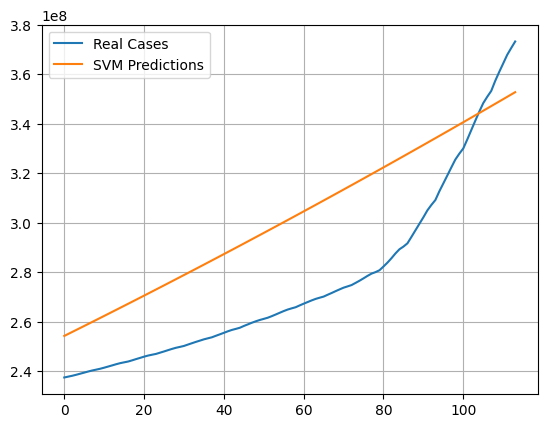

In [23]:
X_all,Y_all,X_train,y_train,X_test,y_test = crv.TrainTestSplit(Passed_days_list,World_cases)
SVM_cases = SVR(shrinking=True, kernel="poly", gamma=0.2, epsilon=0.5, degree=2, C=0.03, coef0=1.5)
crv.test_predictor(X_train,y_train,X_test,y_test,SVM_cases,None,'SVM Predictions', True)
SVM_prediction = crv.CurvePredictor(X_all,Y_all,SVM_cases,None,future_forcast,False)
"""SVΜ_cases.fit(X_all,Y_all)
predict_SVΜ = SVΜ_cases.predict(future_forcast)"""

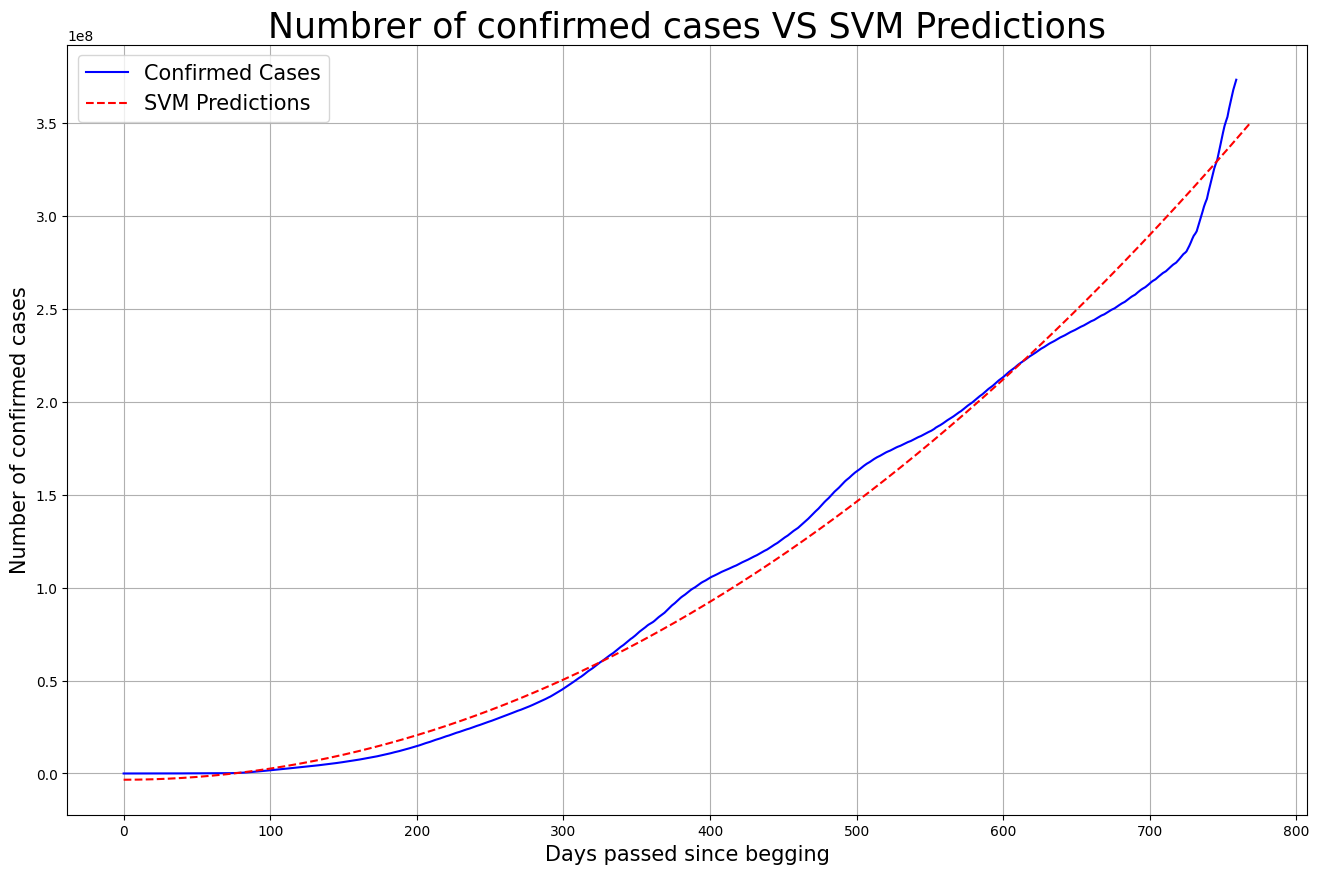

In [22]:
crv.plot_predictions(Y_all, SVM_prediction, adjusted_dates, future_forcast, 'red','SVM Predictions')

In [24]:
SVM_prediction.shape = (len(SVM_prediction),)
crv.Show_prediction_by_day(future_dates_reported,'SVM predictions',SVM_prediction, days_in_future)

SVM predictions for the next 10 days (Total cases):
2022-02-01: 342145518.0
2022-02-02: 343055177.0
2022-02-03: 343966033.0
2022-02-04: 344878084.0
2022-02-05: 345791332.0
2022-02-06: 346705775.0
2022-02-07: 347621414.0
2022-02-08: 348538250.0
2022-02-09: 349456281.0
2022-02-10: 350375508.0
For the next 10 days the New cases will be according to SVM predictions:
2022-02-01: 908464.0
2022-02-02: 909660.0
2022-02-03: 910856.0
2022-02-04: 912051.0
2022-02-05: 913247.0
2022-02-06: 914443.0
2022-02-07: 915639.0
2022-02-08: 916835.0
2022-02-09: 918031.0
2022-02-10: 919227.0


#### Linear Regression Prediction

'linearR_cases.fit(X_all,Y_all)\npredict_linearR = linearR_cases.predict(future_forcast) '

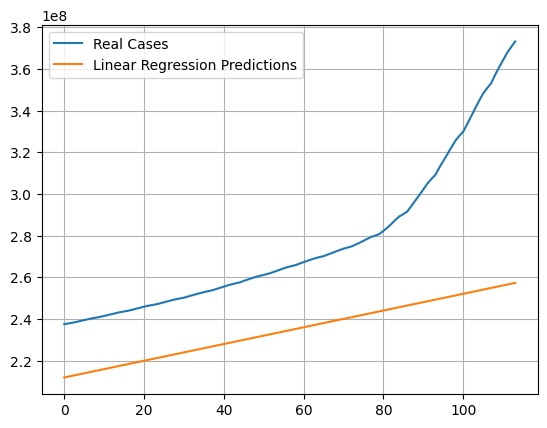

In [30]:
linearR_cases = LinearRegression(fit_intercept=True)
crv.test_predictor(X_train,y_train,X_test,y_test,linearR_cases,None,'Linear Regression Predictions',True)
linear_prediction = crv.CurvePredictor(X_all,Y_all,linearR_cases,None,future_forcast,False)
"""linearR_cases.fit(X_all,Y_all)
predict_linearR = linearR_cases.predict(future_forcast) """

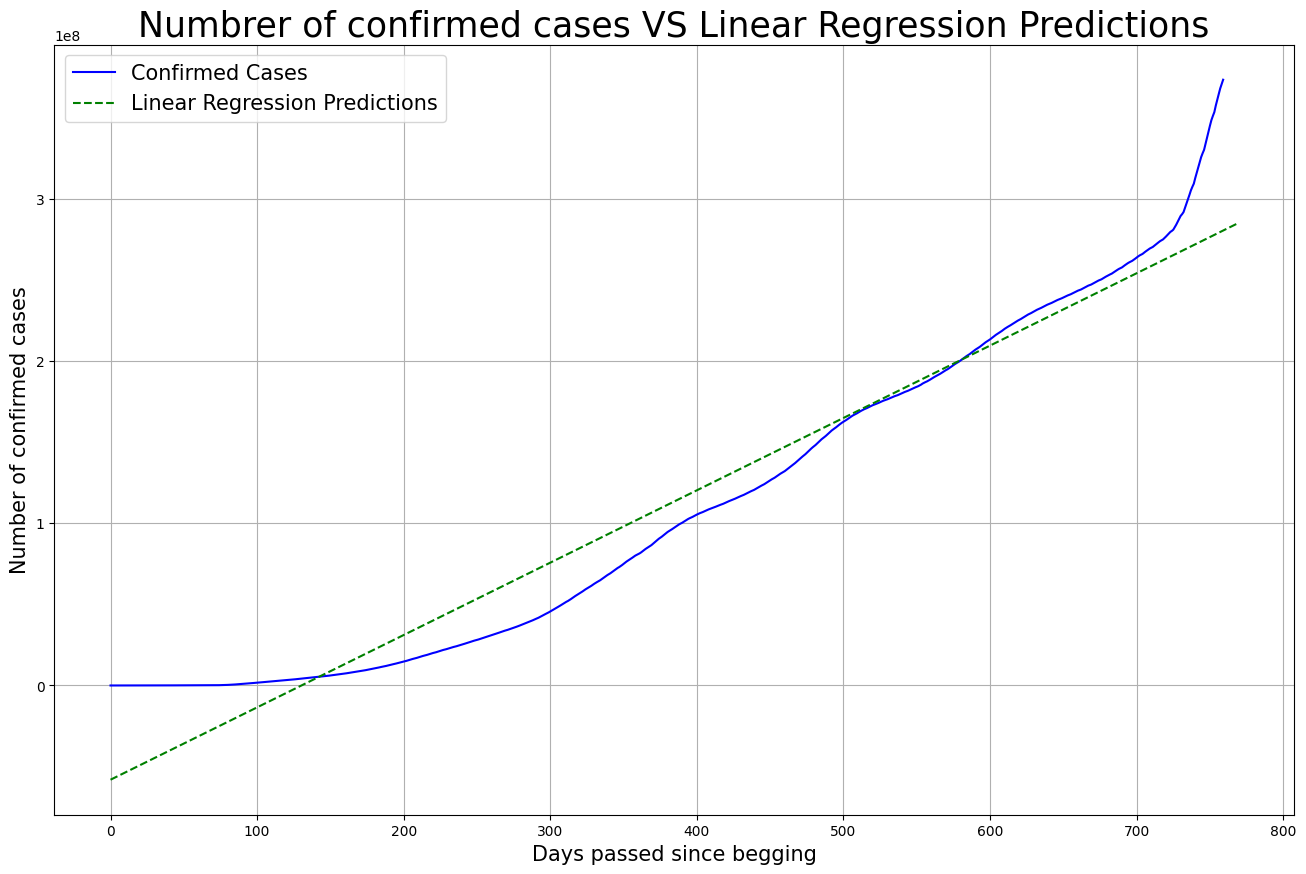

In [31]:
crv.plot_predictions(Y_all, linear_prediction, adjusted_dates, future_forcast, 'green','Linear Regression Predictions')

In [32]:
linear_prediction.shape = (len(linear_prediction),)
crv.Show_prediction_by_day(future_dates_reported,'Linear Regression predictions',linear_prediction, days_in_future)

Linear Regression predictions for the next 10 days (Total cases):
2022-02-01: 280749545.0
2022-02-02: 281195353.0
2022-02-03: 281641161.0
2022-02-04: 282086968.0
2022-02-05: 282532776.0
2022-02-06: 282978584.0
2022-02-07: 283424392.0
2022-02-08: 283870199.0
2022-02-09: 284316007.0
2022-02-10: 284761815.0
For the next 10 days the New cases will be according to Linear Regression predictions:
2022-02-01: 445808.0
2022-02-02: 445808.0
2022-02-03: 445808.0
2022-02-04: 445808.0
2022-02-05: 445808.0
2022-02-06: 445808.0
2022-02-07: 445808.0
2022-02-08: 445808.0
2022-02-09: 445808.0
2022-02-10: 445808.0


#### Polynomial Regression Interpolation

'X_poly_present = poly_reg.fit_transform(X_all)\nX_poly_future = poly_reg.fit_transform(future_forcast)\nlin_reg.fit(X_poly_present, Y_all)\npredict_polynomialR = lin_reg.predict(X_poly_future)'

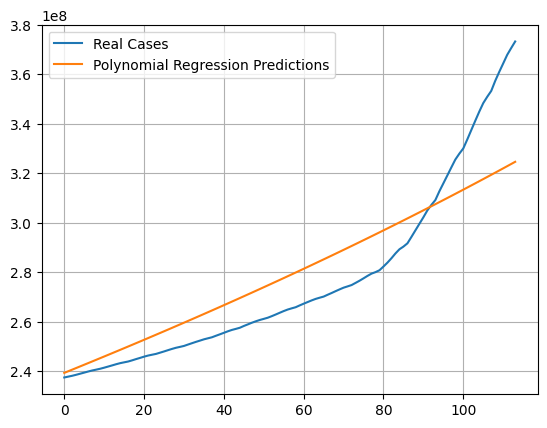

In [33]:
poly_reg = PolynomialFeatures(degree=4)
lin_reg = LinearRegression()
polynomial_prediction = crv.CurvePredictor(X_all,Y_all,poly_reg,lin_reg,future_forcast,False)
crv.test_predictor(X_train,y_train,X_test,y_test,poly_reg,lin_reg,'Polynomial Regression Predictions',False)
"""X_poly_present = poly_reg.fit_transform(X_all)
X_poly_future = poly_reg.fit_transform(future_forcast)
lin_reg.fit(X_poly_present, Y_all)
predict_polynomialR = lin_reg.predict(X_poly_future)"""

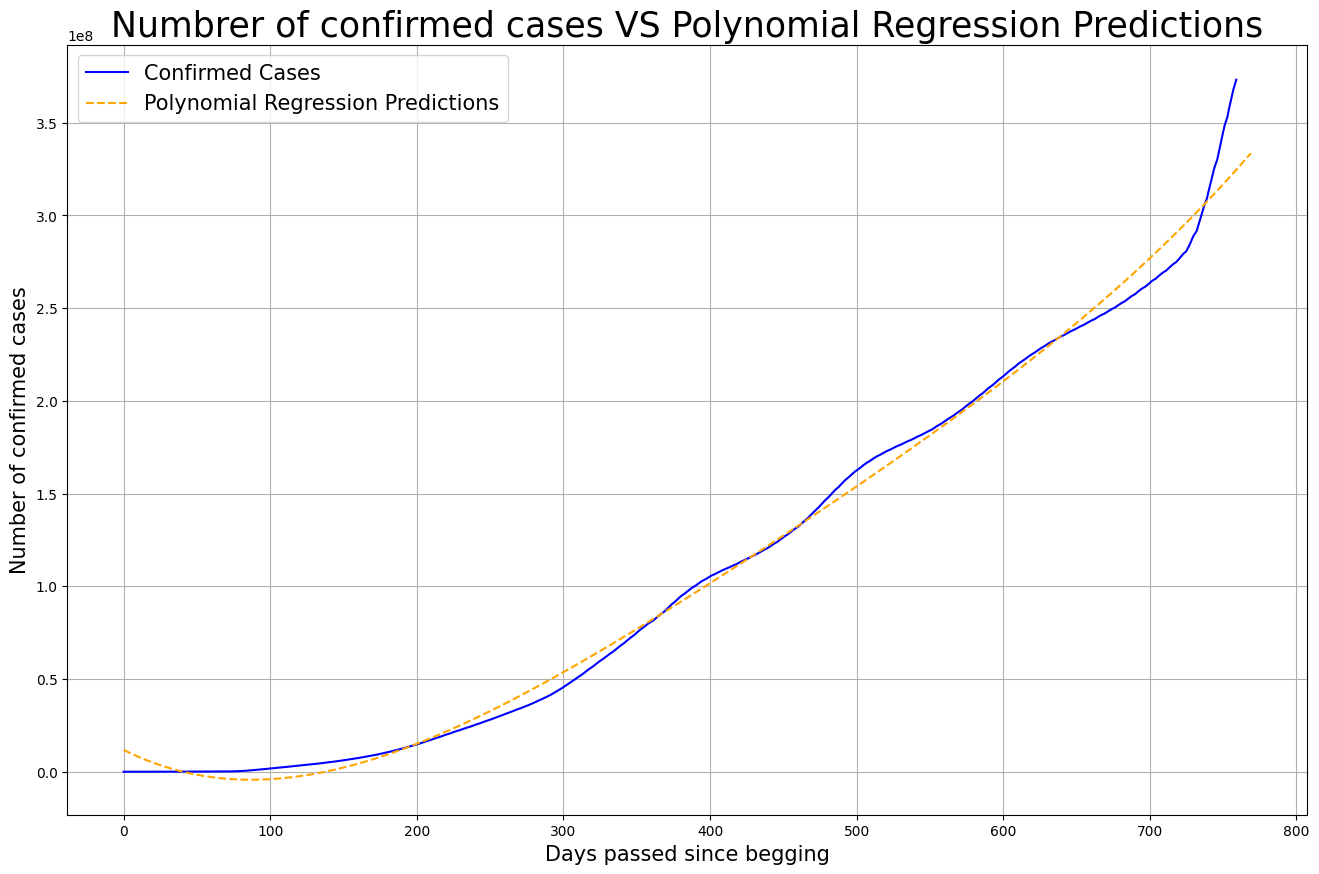

In [34]:
crv.plot_predictions(Y_all, polynomial_prediction, adjusted_dates, future_forcast, 'orange','Polynomial Regression Predictions')

In [35]:
polynomial_prediction.shape = (len(polynomial_prediction),)
crv.Show_prediction_by_day(future_dates_reported,'Polynomial Regression predictions',polynomial_prediction ,days_in_future)

Polynomial Regression predictions for the next 10 days (Total cases):
2022-02-01: 325509040.0
2022-02-02: 326396334.0
2022-02-03: 327286486.0
2022-02-04: 328179513.0
2022-02-05: 329075429.0
2022-02-06: 329974252.0
2022-02-07: 330875999.0
2022-02-08: 331780684.0
2022-02-09: 332688325.0
2022-02-10: 333598939.0
For the next 10 days the New cases will be according to Polynomial Regression predictions:
2022-02-01: 884452.0
2022-02-02: 887294.0
2022-02-03: 890152.0
2022-02-04: 893026.0
2022-02-05: 895917.0
2022-02-06: 898823.0
2022-02-07: 901746.0
2022-02-08: 904686.0
2022-02-09: 907641.0
2022-02-10: 910614.0


#### Bayesian Ridge Interpolation


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


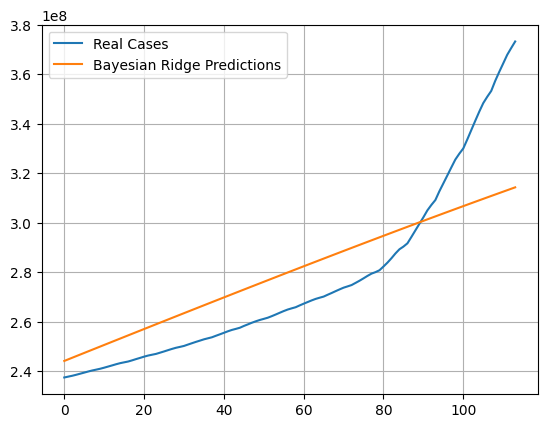

In [37]:
bayesian_poly = PolynomialFeatures(degree=4)
bayesian = BayesianRidge(max_iter=600,compute_score=True,fit_intercept=False)
bayesian_prediction = crv.CurvePredictor(X_all,Y_all,bayesian_poly,bayesian,future_forcast,False)
"""X_new_present = bayesian_poly.fit_transform(X_all)
X_new_future = bayesian_poly.fit_transform(future_forcast)
bayesian.fit(X_new_present,Y_all)
predict_bayesian = bayesian.predict(X_new_future)"""
crv.test_predictor(X_train,y_train,X_test,y_test,bayesian_poly,bayesian,'Bayesian Ridge Predictions',False)

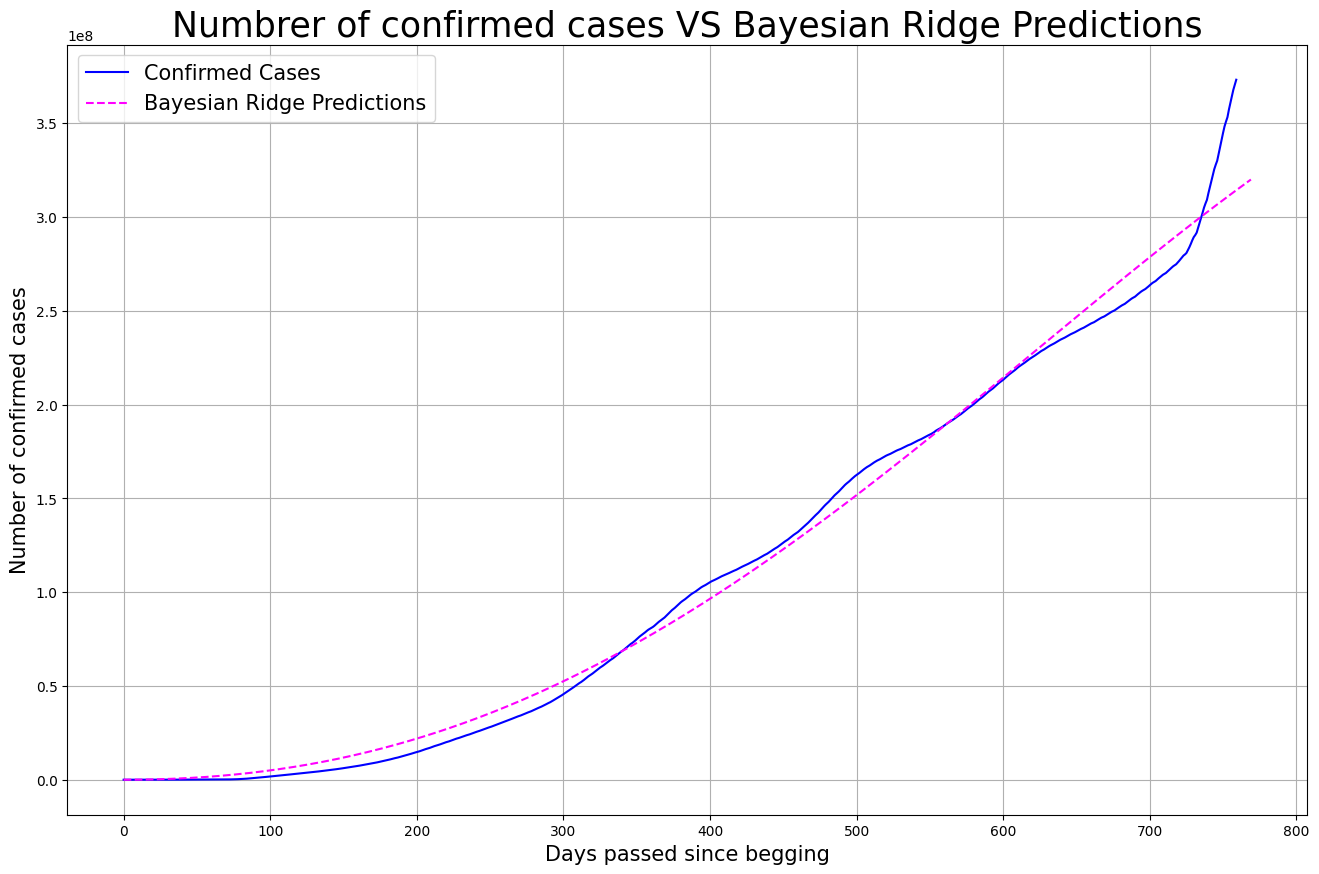

In [38]:
crv.plot_predictions(Y_all, bayesian_prediction, adjusted_dates, future_forcast, 'magenta','Bayesian Ridge Predictions')

In [39]:
crv.Show_prediction_by_day(future_dates_reported,'Bayesian Ridge predictions',bayesian_prediction, days_in_future)

Bayesian Ridge predictions for the next 10 days (Total cases):
2022-02-01: 314884596.0
2022-02-02: 315459151.0
2022-02-03: 316032559.0
2022-02-04: 316604810.0
2022-02-05: 317175895.0
2022-02-06: 317745803.0
2022-02-07: 318314525.0
2022-02-08: 318882052.0
2022-02-09: 319448374.0
2022-02-10: 320013479.0
For the next 10 days the New cases will be according to Bayesian Ridge predictions:
2022-02-01: 575692.0
2022-02-02: 574555.0
2022-02-03: 573408.0
2022-02-04: 572251.0
2022-02-05: 571085.0
2022-02-06: 569908.0
2022-02-07: 568723.0
2022-02-08: 567527.0
2022-02-09: 566321.0
2022-02-10: 565106.0


#### Prediction using the Prophet model

In [41]:
daily_world_cases = np.array(daily_world_cases)
daily_world_cases.shape = (len(daily_world_cases),1)
Dates_reported = np.array(Dates_reported)
Dates_reported.shape = (len(Dates_reported),1)
World_cases_perday = np.concatenate((Dates_reported,daily_world_cases), axis=1)
World_cases_perday = pd.DataFrame(data=World_cases_perday)
World_cases_perday.columns = ['ds', 'y']
print(World_cases_perday)

             ds          y
0    2020-01-03        0.0
1    2020-01-04        1.0
2    2020-01-05        0.0
3    2020-01-06        3.0
4    2020-01-07        0.0
..          ...        ...
755  2022-01-27  3604315.0
756  2022-01-28  3435654.0
757  2022-01-29  3469041.0
758  2022-01-30  2740803.0
759  2022-01-31  2657167.0

[760 rows x 2 columns]


In [43]:
ph = Prophet(n_changepoints=41, changepoint_prior_scale=1 , interval_width=1, daily_seasonality=True, yearly_seasonality=True, seasonality_mode='additive',seasonality_prior_scale=10)
ph.fit(World_cases_perday)
World_cases_perday.tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqljsg8hu/48q9pgjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqljsg8hu/70dm5dan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70658', 'data', 'file=/tmp/tmpqljsg8hu/48q9pgjz.json', 'init=/tmp/tmpqljsg8hu/70dm5dan.json', 'output', 'file=/tmp/tmpqljsg8hu/prophet_model8cjswm1l/prophet_model-20250131152553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds          y
755  2022-01-27  3604315.0
756  2022-01-28  3435654.0
757  2022-01-29  3469041.0
758  2022-01-30  2740803.0
759  2022-01-31  2657167.0

In [46]:
future_prediction = ph.make_future_dataframe(periods=10)
future_prediction.tail(10)

ds
760 2022-02-01
761 2022-02-02
762 2022-02-03
763 2022-02-04
764 2022-02-05
765 2022-02-06
766 2022-02-07
767 2022-02-08
768 2022-02-09
769 2022-02-10

In [47]:
forecast = ph.predict(future_prediction)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

ds          yhat    yhat_lower    yhat_upper
760 2022-02-01  3.246078e+06  2.871133e+06  3.592372e+06
761 2022-02-02  3.361947e+06  3.028818e+06  3.718821e+06
762 2022-02-03  3.411250e+06  3.028138e+06  3.767259e+06
763 2022-02-04  3.430392e+06  2.986241e+06  3.759907e+06
764 2022-02-05  3.434399e+06  3.099736e+06  3.762831e+06
765 2022-02-06  3.423128e+06  3.098941e+06  3.798496e+06
766 2022-02-07  3.359992e+06  3.006560e+06  3.691952e+06
767 2022-02-08  3.346179e+06  2.988264e+06  3.758551e+06
768 2022-02-09  3.472333e+06  3.079488e+06  3.940290e+06
769 2022-02-10  3.532323e+06  3.182933e+06  4.002248e+06

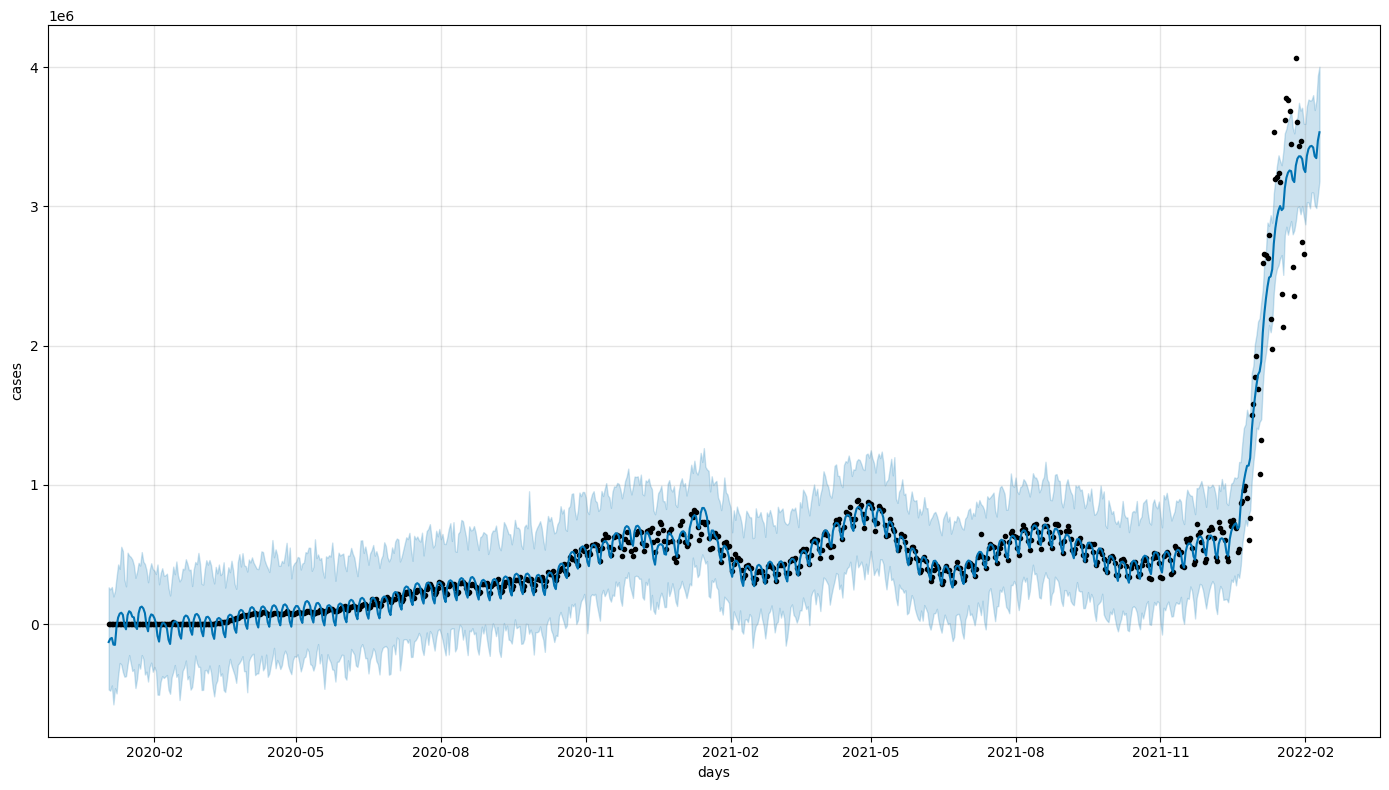

In [48]:
future_plot = ph.plot(forecast, figsize=(14,8), xlabel='days', ylabel='cases')

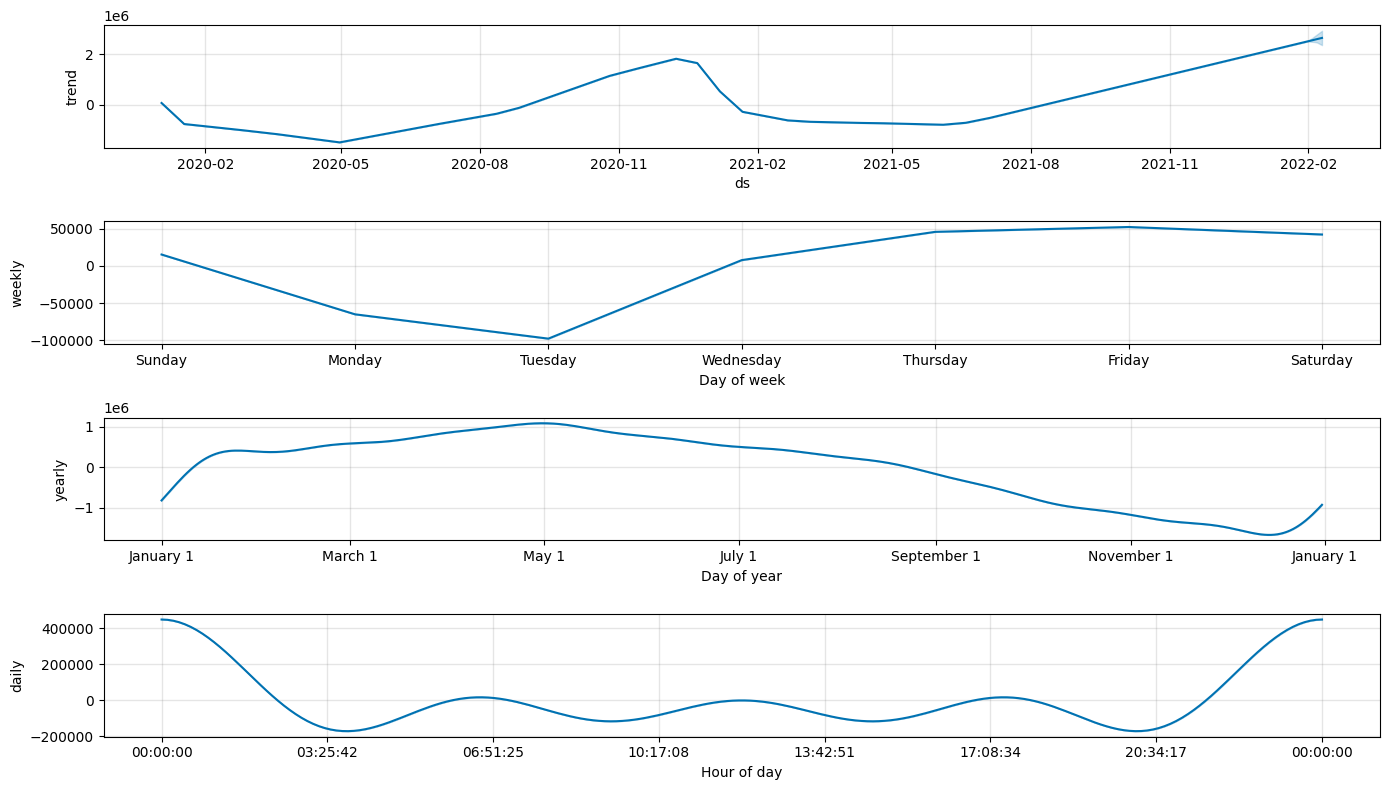

In [49]:
trends_weekly_dayly_plot = ph.plot_components(forecast, figsize=(14,8))

#### Prediction using ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=511160.746980, expected=610184.000000
predicted=658349.775252, expected=591833.000000
predicted=539753.569353, expected=602090.000000
predicted=606521.417192, expected=616931.000000
predicted=581835.917678, expected=545880.000000
predicted=448272.501593, expected=430657.000000
predicted=511721.156061, expected=451817.000000
predicted=567451.391209, expected=718398.000000
predicted=737128.082477, expected=640943.000000
predicted=620954.640921, expected=662820.000000
predicted=680792.239013, expected=588784.000000
predicted=552081.794877, expected=529946.000000
predicted=420161.082384, expected=449229.000000
predicted=564133.953287, expected=468124.000000
predicted=574449.648164, expected=626082.000000
predicted=681779.900962, expected=675021.000000
predicted=631267.993821, expected=699445.000000
predicted=628521.859428, expected=685667.000000
predicted=583342.728970, expected=618993.000000
predicted=520132.816571, expected=482214.000000
predicted=538157.071304, expected=455178

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=984208.439697, expected=1505200.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1478090.717481, expected=1578220.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1374725.363500, expected=1777290.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1824355.928070, expected=1927135.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1811352.891153, expected=1686187.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1455546.279622, expected=1076793.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1511627.461897, expected=1319647.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1882034.878369, expected=2590152.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2817057.463132, expected=2655312.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2440333.104100, expected=2647331.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2871320.574782, expected=2632617.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2454863.482599, expected=2793381.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2109471.216510, expected=2192625.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2487075.033274, expected=1972381.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2883928.717815, expected=3535743.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4181951.125467, expected=3194847.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3128461.887127, expected=3207778.000000
predicted=3683776.154479, expected=3238147.000000
predicted=3520146.524743, expected=3173416.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2416799.546808, expected=2369851.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2895631.662854, expected=2136622.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2955214.727079, expected=3618362.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3778777.317782, expected=3778798.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3271253.080311, expected=3766879.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3631324.520322, expected=3685829.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3449407.329170, expected=3445048.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2634303.406724, expected=2565856.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2919121.052441, expected=2355098.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3399802.212650, expected=4068855.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4512099.699339, expected=3604315.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3741865.492840, expected=3435654.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3907807.992058, expected=3469041.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3237895.119130, expected=2740803.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1695482.721120, expected=2657167.000000


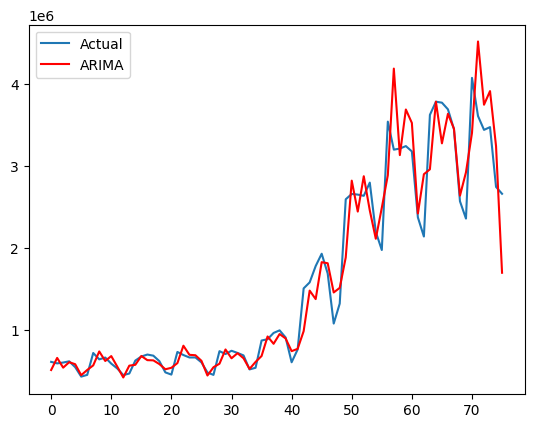

The R_squared value is:  0.923
The root mean squared percentage error (RMSPE) is:  15.31 %
The mean absolute percentage error (MAPE) is:  12.18 %
Final Accuracy of ARIMA is:  87.82 %
Test RMSE: 323704.712


In [53]:
#evaluate an ARIMA model using a walk-forward validation
data_a = Daily_World_cases
labels = np.array(data_a)
size = int(len(labels) * 0.9)
train, test = labels[0:size], labels[size:len(labels)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(5,2,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
# plot forecasts against actual outcomes
pyplot.plot(test, label="Actual")
pyplot.plot(predictions, color='red', label="ARIMA")
pyplot.legend()
pyplot.show()
mtr.R_square(test,predictions)
mtr.RMSPE(test,predictions)
mtr.MAPE(predictions,test,0)
print("Final Accuracy of ARIMA is: ", np.round(100-np.mean(mtr.accuracy_func([],test,predictions)),2),"%")
print('Test RMSE: %.3f' % rmse)

In [64]:
Overall,countries_geo = vis.MapPreparation(Overall_per_country)
for i in range(len(Overall)):
  print(Overall[0][i], Overall[1][i], "           ", Overall_per_country[i][0], Overall_per_country[i][1])

https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json
Afghanistan 162140.0             Afghanistan 162140.0
Albania 258021.0             Albania 258021.0
Algeria 250774.0             Algeria 250774.0
Angola 98076.0             American Samoa 18.0
Antarctica 18.0             Andorra 35556.0
Argentina 8335184.0             Angola 98076.0
Armenia 367795.0             Anguilla 2324.0
Australia 2159490.0             Antigua and Barbuda 6558.0
Austria 1834504.0             Argentina 8335184.0
Azerbaijan 656284.0             Armenia 367795.0
Bangladesh 1798833.0             Aruba 32718.0
Belarus 740988.0             Australia 2159490.0
Belgium 3055925.0             Austria 1834504.0
Belize 50487.0             Azerbaijan 656284.0
Benin 26450.0             Bahamas 32282.0
Bhutan 4891.0             Bahrain 368767.0
Bolivia 1798833.0             Bangladesh 1798833.0
Bosnia and Herzegovina 346651.0             Barbados 42122.0
Botswana 250746.0    

In [65]:
alist = [0, 0.85, 0.93, 0.96, 0.985, 0.991, 0.995,1]
Legends = ['Cases','Deaths','Tests','Mortality', 'Cases per milion', 'Deaths per milion']
Map = vis.MakeMap(1,'OrRd',alist, Legends,Overall,countries_geo)
Map

In [66]:
alist = [0, 0.82, 0.9, 0.94, 0.968, 0.985, 0.993,1]
Map = vis.MakeMap(2,'BuPu',alist,Legends,Overall,countries_geo)
Map

In [67]:
alist = [0, 0.5, 0.8, 0.9, 0.96, 0.991, 0.995,1]
Map = vis.MakeMap(4,'YlGnBu',alist,Legends,Overall,countries_geo)
Map

In [68]:
alist = [0, 0.49, 0.65, 0.75, 0.89, 0.954, 0.984,1]
Map = vis.MakeMap(5,'YlGn',alist,Legends,Overall,countries_geo)
Map

In [69]:
alist = [0, 0.6, 0.72, 0.83, 0.9, 0.975, 0.993,1]
Map = vis.MakeMap(6,'YlOrRd',alist,Legends,Overall,countries_geo)
Map